In [3]:
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from utils import CountVectorizer, TfidfVectorizer, Ngram

In [4]:
obj_tbl = pd.read_csv("../../data/tables/Objects.csv.gz")
str_cols = "Title", "Description"
txts = [s for col in str_cols for s in obj_tbl[col].dropna()]

print("number of docs: ", len(txts))
# print("number of docs: ", len(txts))

number of docs:  11199


In [5]:
tokens = [w for txt in txts for w in txt.split()]

print("number of tokens: ", len(tokens))
print("number of types: ", len(set(tokens)))
print("TTR: ", len(set(tokens))/len(tokens))

number of tokens:  274580
number of types:  43518
TTR:  0.15848932915725836


## N-grams

In [6]:
NG = Ngram((1,2), txts, precompute_freqs=True)

(1, 2)-grams: Term Document Matrix constructed...
(1, 2)-grams: Term frequencies precomputed...
(1, 2)-grams: Init done


In [ ]:
# save for later
NG.save("count")

## PMI

compute PMI values for all observed pairs of words

In [7]:
pmis = {w: NG.pmi(*w.split()) for w in NG.vocab(2)}

In [62]:
for w, val in sorted(pmis.items(), key=lambda tup: tup[1], reverse=True):
    if 9.5 < val < 110:
        u, v = w.split()
        if NG.freq(u)+NG.freq(v) > 10:
            print(w, round(val, 4), "\t", NG.freq(u), NG.freq(v), NG.freq(u, v))

japanese surrender 16.4475 	 6 5 5
bin nullol 16.4475 	 6 5 5
artistic similarities 16.4475 	 6 5 5
phra keo 16.4475 	 6 5 5
independent entrepreneur 16.4475 	 6 5 5
buildings companies 16.4475 	 6 5 5
mon souci 16.4475 	 6 5 5
great demand 16.4475 	 6 5 5
149 daylight 16.4475 	 6 5 5
older sister 16.4475 	 6 5 5
castiglione 1688 16.4475 	 6 6 6
zomerpaleis yuanming 16.4475 	 6 6 6
issues_online issue_xxix_ii_2008 16.4475 	 6 6 6
increasing numbers 16.4475 	 5 6 5
haddon layard 16.4475 	 6 6 6
mbwela amboella 16.4475 	 6 6 6
lifeless trunks 16.4475 	 6 6 6
romantic ideal 16.4475 	 5 6 5
minds perceive 16.4475 	 6 6 6
vliegbasis andir 16.4475 	 6 6 6
immediately apparent 16.4475 	 5 6 5
summer shade 16.4475 	 6 6 6
waxprint staal 16.4475 	 5 6 5
margarita gonzalez 16.4475 	 6 6 6
holiday destination 16.4475 	 5 6 5
autumn textures 16.4475 	 6 6 6
guiseppe castiglione 16.4475 	 6 6 6
garutsche apotheek 16.4475 	 5 6 5
douglas newton 16.4475 	 5 6 5
thereupon expressed 16.4475 	 6 6 6
obs

albertus johannes 15.7105 	 7 10 7
deelstaat oaxaca 15.7105 	 4 10 4
1951 281 15.7105 	 10 2 2
hans aalpol 15.7105 	 10 2 2
waardeering aangeboden 15.7105 	 1 10 1
oostelijke pendestijl 15.7105 	 10 1 1
meisho zue 15.7105 	 10 4 4
harvey company 15.7105 	 4 10 4
hans hoogenberk 15.7105 	 10 1 1
mo fujimusume 15.7105 	 10 1 1
box 2575 15.7105 	 10 1 1
drabbe 1940 15.7105 	 3 10 3
leemans genummerd 15.7105 	 6 5 3
tussenin geklemd 15.7105 	 1 10 1
ghana immigration 15.7105 	 10 1 1
prangs heiligdommen 15.7105 	 1 10 1
zgn maka 15.7105 	 10 1 1
1995 333 15.7105 	 10 1 1
buitenste breeden 15.7105 	 10 1 1
weefgetouw kahiwoeang 15.7105 	 10 3 3
johannes bauduin 15.7105 	 10 7 7
date excavation 15.7105 	 10 6 6
nov 5th 15.7105 	 10 6 6
mata moedergodin 15.7105 	 10 3 3
barro liso 15.7105 	 10 6 6
begonnen pels 15.7105 	 10 3 3
tibetaanse blokdruk 15.7105 	 5 6 3
http caans 15.7105 	 10 6 6
hooggeplaatste nederlanders 15.7105 	 5 6 3
merk lamas 15.7105 	 10 3 3
instituutsgebouw nieuwbouw 15.7

heringa 1996 15.4475 	 6 10 5
often interlocking 15.4475 	 12 2 2
deskundig publiek 15.4475 	 1 12 1
kolommentjes diam 15.4475 	 1 12 1
zeewiergroen geglazuurd 15.4475 	 2 12 2
dueling arrows 15.4475 	 2 12 2
so creates 15.4475 	 12 1 1
parang rusak 15.4475 	 12 2 2
gadh kasteel 15.4475 	 9 4 3
fair copy 15.4475 	 6 12 6
parang sarpo 15.4475 	 12 1 1
mogen opneemen 15.4475 	 12 1 1
langstzittende president 15.4475 	 1 12 1
groter aandeel 15.4475 	 12 1 1
javasche bank 15.4475 	 2 12 2
semigeometrische ontwerpen 15.4475 	 2 12 2
ww bl 15.4475 	 2 12 2
bellino 2012 15.4475 	 1 12 1
rijpende rijstvelden 15.4475 	 1 12 1
handelsroutes ruilhandel 15.4475 	 3 12 3
garen wikkelend 15.4475 	 12 4 4
live nearby 15.4475 	 12 1 1
glad rolsteentje 15.4475 	 12 2 2
gedroogde mosselen 15.4475 	 12 2 2
ms edi 15.4475 	 12 1 1
oorbellen kammen 15.4475 	 1 12 1
handelspartner la 15.4475 	 1 12 1
th hoedt 15.4475 	 12 1 1
natuur kopie 15.4475 	 12 1 1
rijstvelden scheerden 15.4475 	 12 1 1
378l betreffe

nederl graven 15.2251 	 1 14 1
omtrekken borduurwerk 15.2251 	 1 14 1
droge hoest 15.2251 	 14 2 2
dierenwereld info 15.2251 	 2 14 2
construct complete 15.2251 	 1 14 1
verwarrende benaming 15.2251 	 1 14 1
uiterst nauwkeurig 15.2251 	 7 4 2
asia edited 15.2251 	 14 5 5
jo awok 15.2251 	 14 1 1
boren krismakersgereedschap 15.2251 	 7 4 2
asia melanesia 15.2251 	 14 1 1
1963 carel 15.2251 	 7 4 2
droge voedingsmiddelen 15.2251 	 14 2 2
zestien stuks 15.2251 	 2 14 2
observaties 1885 15.2251 	 3 14 3
adjudant kap 15.2251 	 7 12 6
cabochon geslepen 15.2251 	 2 14 2
persoonlijke tegenslagen 15.2251 	 14 2 2
koeien buffels 15.2251 	 6 7 3
hierop toegelegd 15.2251 	 14 3 3
code attiri 15.2251 	 7 6 3
goudkleurig randje 15.2251 	 8 7 4
goedkope kra 15.2251 	 7 6 3
sociaal wetenschappelijk 15.2251 	 12 7 6
aug 1933 15.2251 	 6 7 3
1885 315 15.2251 	 14 3 3
tandjong poera 15.2251 	 14 3 3
westers perspectief 15.2251 	 14 6 6
complete bizonhuiden 15.2251 	 14 3 3
project koulipele 15.2251 	 7 6

binding horizontaal 15.1256 	 1 15 1
fotografie missiefotografie 15.1256 	 15 3 3
plaat deeg 15.1256 	 15 1 1
edele prinsentype 15.1256 	 15 1 1
pieter kocq 15.1256 	 15 2 2
duidelijke bloedgroef 15.1256 	 15 1 1
raahe neemt 15.1256 	 1 15 1
geometrical designs 15.1256 	 2 15 2
doorgebogen knieen 15.1256 	 2 15 2
lichte ivoorkleur 15.1256 	 15 1 1
kunstmarkten georganiseerd 15.1256 	 2 15 2
arbeidsters vrouwelijk 15.1256 	 1 15 1
fotografie expeditiefotografie 15.1256 	 15 6 6
vaders saambera 15.1256 	 5 6 2
pieter servire 15.1256 	 15 1 1
popular incarnations 15.1256 	 15 1 1
wnwguin 1960 15.1256 	 1 15 1
medan deliserdang 15.1256 	 15 1 1
naamloos begraven 15.1256 	 1 15 1
demonstreert jasje 15.1256 	 1 15 1
inauguralis prof 15.1256 	 1 15 1
gewatteerde jasje 15.1256 	 1 15 1
schaamschort 668 15.1256 	 15 1 1
ahoy rotterdam 15.1256 	 6 15 6
glazen stopflesje 15.1256 	 15 1 1
bovenschrift medan 15.1256 	 1 15 1
lime containers 15.1096 	 13 7 6
governor general 15.0876 	 11 14 10
tandj

toor beschrijft 15.0325 	 4 8 2
gemelde plantagie 15.0325 	 4 12 3
nadere plaatsaanduiding 15.0325 	 16 1 1
scorpion incised 15.0325 	 1 16 1
mexicaanse chauffeurs 15.0325 	 16 1 1
hagedissen allen 15.0325 	 1 16 1
small pangal 15.0325 	 16 1 1
mula mula 15.0325 	 8 8 4
caludovica palm 15.0325 	 1 16 1
populaire beeldcultuur 15.0325 	 16 4 4
bakkie koffie 15.0325 	 1 16 1
jalal ad 15.0325 	 1 16 1
populaire incarnaties 15.0325 	 16 1 1
ume rough 15.0325 	 4 8 2
jeu pokmbu 15.0325 	 16 4 4
seed beads 15.0325 	 3 16 3
loden gewicht 15.0325 	 1 16 1
zic incisie 15.0325 	 13 16 13
weduwe abraham 15.0325 	 8 6 3
regelmatig voorkwamen 15.0325 	 16 3 3
lebar ingericht 15.0325 	 8 6 3
oorlogsvoering havens 15.0325 	 16 3 3
bezoekers lokt 15.0325 	 16 3 3
preekstoel minbar 15.0325 	 8 6 3
von wissmann 15.0325 	 16 3 3
samengestelde fantasielandschappen 15.0325 	 16 6 6
ch welter 15.0325 	 16 6 6
bezoekers ertoe 15.0325 	 16 3 3
ruiten afhanke 15.0325 	 16 3 3
verenigde staten 15.0187 	 14 15 13

congo belge 14.8625 	 18 1 1
gaza afgebroken 14.8625 	 1 18 1
indians borrowed 14.8625 	 18 1 1
hervey cook 14.8625 	 2 9 1
mask combines 14.8625 	 9 2 1
kleinkinderen passen 14.8625 	 2 9 1
slee rondgebogen 14.8625 	 18 1 1
mesghali koos 14.8625 	 18 2 2
go back 14.8625 	 2 9 1
932 45 14.8625 	 1 18 1
tweedimensionaal blijven 14.8625 	 1 18 1
niebuhrs boeken 14.8625 	 4 9 2
india cy 14.8625 	 18 1 1
kota datuk 14.8625 	 18 2 2
uitstekende onderranden 14.8625 	 18 1 1
voornaamste houdingen 14.8625 	 18 1 1
ceremonien bereidden 14.8625 	 18 1 1
idem vr 14.8625 	 18 1 1
original inhabitants 14.8625 	 18 8 8
original manga 14.8625 	 18 1 1
christelijke geloofsaspecten 14.8625 	 18 1 1
schotsgeruite eieren 14.8625 	 2 9 1
geografie jogjakarta 14.8625 	 3 12 2
mevrouw bremer 14.8625 	 9 2 1
instrument vary 14.8625 	 18 2 2
raden toemenggoeng 14.8625 	 18 1 1
esthetische dimensie 14.8625 	 9 2 1
keizer qin 14.8625 	 18 1 1
lendendoek opgehouden 14.8625 	 9 2 1
bandoeng tasikmalaja 14.8625 	 

suikerfabriek kalibagor 14.763 	 15 9 7
world war 14.7471 	 13 9 6
aangeregen coix 14.7471 	 3 13 2
scheuren optreden 14.7471 	 3 13 2
wijaksana ingkang 14.7471 	 3 13 2
hedendaagse luizen 14.7471 	 13 3 2
buitenzorg bet 14.7471 	 13 3 2
fijn haakwerk 14.7471 	 13 3 2
mindere mate 14.737 	 12 18 11
filippijnen 1898 14.725 	 9 11 5
wijd uiteen 14.7105 	 8 5 2
zulu introduceerde 14.7105 	 20 1 1
betel nut 14.7105 	 8 5 2
adatkleding bieden 14.7105 	 2 20 2
nylon werpnet 14.7105 	 20 2 2
voertuig zgn 14.7105 	 2 10 1
brengt vernieuwing 14.7105 	 10 2 1
shohen 1e 14.7105 	 4 10 2
rang verbeeldden 14.7105 	 12 5 3
fraaie versie 14.7105 	 10 2 1
voedselbereiding voedselopscheplepels 14.7105 	 10 2 1
tribes ended 14.7105 	 10 2 1
dodencultus erg 14.7105 	 1 20 1
seret hoofdpatroon 14.7105 	 3 20 3
westen beschuldigt 14.7105 	 20 1 1
bovenaan beschikt 14.7105 	 20 1 1
rolmachine bedrukt 14.7105 	 1 20 1
nadere omschrijving 14.7105 	 16 5 4
beplanten terrein 14.7105 	 1 20 1
dynasty http 14.710

vingers vluchtig 14.6402 	 21 1 1
inhoud godenspijs 14.6402 	 21 1 1
vruchtbaarheid joubert 14.6402 	 21 1 1
colliers versieren 14.6402 	 2 21 2
woord kurda 14.6402 	 21 1 1
tsunokakushi hoofdtooi 14.6402 	 1 21 1
onderwees gedurende 14.6402 	 2 21 2
parambanan yogyakarta 14.6402 	 7 18 6
fijne plooitjes 14.6402 	 21 1 1
denkbaar gedurende 14.6402 	 1 21 1
ver schillende 14.6402 	 21 1 1
infrastructuur nagenoeg 14.6402 	 3 14 2
beschikbare bronnen 14.6402 	 1 21 1
speelgoed stier 14.6402 	 21 1 1
natuurlijke historien 14.6402 	 21 1 1
bronnen onderbouwen 14.6402 	 21 2 2
ver magerd 14.6402 	 21 1 1
meegedrukt onderaan 14.6402 	 1 21 1
ver inisiatip 14.6402 	 21 1 1
geprofileerd driehoekige 14.6402 	 1 21 1
lederen beenbekleedsels 14.6402 	 7 9 3
run aanvallen 14.6402 	 1 21 1
meiji 36 14.6402 	 4 21 4
cult abelam 14.6402 	 2 21 2
wooden bowl 14.6402 	 21 1 1
driehoekige haarpin 14.6402 	 21 1 1
driehoekige meanders 14.6402 	 21 1 1
grasbundel geschoten 14.6402 	 6 21 6
afstuderen gedur

nummers 7023 14.573 	 11 2 1
lugongo april 14.573 	 1 22 1
rechter deurtje 14.573 	 11 2 1
yi dam 14.573 	 2 11 1
schrift verkeerd 14.573 	 11 2 1
person family 14.573 	 4 11 2
koper reumatiek 14.573 	 22 1 1
hiervan opraakte 14.573 	 22 1 1
63rd station 14.573 	 1 22 1
building during 14.573 	 2 11 1
kledingstuk idup 14.573 	 11 2 1
1912 222 14.573 	 22 2 2
life changed 14.573 	 22 1 1
rosa hiervan 14.573 	 2 22 2
geschonken igorotten 14.573 	 22 1 1
godheid worddt 14.573 	 22 2 2
karbouwenhuid voorstellende 14.573 	 1 22 1
geopende bek 14.573 	 4 11 2
samengebonden zodanig 14.573 	 2 11 1
hevige strijd 14.573 	 1 22 1
spelen rinkelen 14.573 	 22 1 1
mouwloos kledingstuk 14.573 	 4 11 2
kimono 4151 14.573 	 22 1 1
tegenover kwaliteitsstukken 14.573 	 22 1 1
cinde ikat 14.573 	 2 11 1
carne into 14.573 	 2 11 1
1845 1912 14.573 	 1 22 1
group leader 14.573 	 11 2 1
sprekende bevolkingsgroepen 14.573 	 8 11 4
mlingano april 14.573 	 1 22 1
achterlatend daarmee 14.573 	 1 22 1
746 46 14.

dagelijkse verzorging 14.4475 	 24 1 1
laag tij 14.4475 	 24 2 2
natte rijstvelden 14.4475 	 2 12 1
onderzoeken heb 14.4475 	 3 8 1
afneembare hoed 14.4475 	 1 24 1
waterhouders mogen 14.4475 	 4 12 2
more suitable 14.4475 	 24 1 1
gulden munten 14.4475 	 2 12 1
geruime afstand 14.4475 	 4 18 3
ervan doorgaat 14.4475 	 24 1 1
more dependent 14.4475 	 24 1 1
pouwer 1954 14.4475 	 4 12 2
eikichi 1856 14.4475 	 2 12 1
plantaardige indigo 14.4475 	 12 2 1
geteelde tabak 14.4475 	 1 24 1
nefta 1966 14.4475 	 1 24 1
tombeau lit 14.4475 	 3 8 1
mala koningin 14.4475 	 3 8 1
hertenhuiden verwerkt 14.4475 	 3 24 3
ouden hoeden 14.4475 	 3 8 1
enveloppen geslagen 14.4475 	 2 12 1
more problems 14.4475 	 24 1 1
bolvormige koepel 14.4475 	 12 2 1
japanse onderne 14.4475 	 24 1 1
hoorn bewaart 14.4475 	 24 1 1
tempelcomplex vanthe 14.4475 	 24 1 1
size 56 14.4475 	 6 8 2
rauwe sago 14.4475 	 3 16 2
intensief ge 14.4475 	 3 24 3
pilaren mogen 14.4475 	 2 12 1
japanse esdoorn 14.4475 	 24 1 1
schilde

ad din 14.2955 	 16 5 3
garuda mungkur 14.2955 	 20 4 3
erg duur 14.2955 	 20 4 3
boepoet sultan 14.2776 	 1 27 1
80 million 14.2776 	 27 8 8
fabrieksmatig gemaakte 14.2776 	 3 18 2
bondgenoten waaronder 14.2776 	 1 27 1
mini angisa 14.2776 	 2 27 2
katrina ervaren 14.2776 	 3 9 1
voornamer gezin 14.2776 	 1 27 1
offergerei offerschaal 14.2776 	 3 9 1
mooie goedgevormde 14.2776 	 27 1 1
halfedelstenen waaronder 14.2776 	 1 27 1
gods helper 14.2776 	 27 1 1
venetiaans glas 14.2776 	 3 27 3
armleuning 50 14.2776 	 1 27 1
sultan abdulhamid 14.2776 	 27 1 1
bis poles 14.2776 	 3 9 1
boortorens bebouwing 14.2776 	 3 9 1
drawn back 14.2776 	 3 9 1
angisa ruiker 14.2776 	 27 2 2
gezin aalmoezen 14.2776 	 27 1 1
tangen glas 14.2776 	 1 27 1
insight all 14.2776 	 1 27 1
where under 14.2776 	 15 9 5
kleurig geverfde 14.2776 	 3 9 1
mumbai bombay 14.2776 	 3 9 1
sultan iskander 14.2776 	 27 4 4
50 51oud 14.2776 	 27 1 1
50 schapenwol 14.2776 	 27 1 1
waaronder museumwinkels 14.2776 	 27 1 1
zeils

symboliek heringa 14.1256 	 10 6 2
erg lastig 14.1256 	 20 3 2
graag vermelding 14.1256 	 15 2 1
young 1998 14.1256 	 5 6 1
doorgaans khana 14.1256 	 30 1 1
voormalig untergouverneur 14.1256 	 30 2 2
ruwhouten greep 14.1256 	 1 30 1
dutch malay 14.1256 	 15 2 1
moderne digitale 14.1256 	 15 2 1
ingreep stonden 14.1256 	 2 15 1
blijkt wederzijds 14.1256 	 15 4 2
lotus medaillons 14.1256 	 10 3 1
ara peyotisten 14.1256 	 10 3 1
taunaij pieter 14.1256 	 2 15 1
hoogste rangen 14.1256 	 15 6 3
shop where 14.1256 	 2 15 1
59 bromhouten 14.1256 	 10 3 1
benguet provincie 14.1256 	 1 30 1
provincie cagayan 14.1256 	 30 1 1
saharische handel 14.1256 	 4 30 4
putjes sporen 14.1256 	 2 15 1
geval leeftijdsklasse 14.1256 	 30 1 1
voormalig roverhoofdman 14.1256 	 30 1 1
kleinzoon londa 14.1256 	 10 3 1
1984 85 14.1256 	 15 2 1
aangebrachte inslagdraden 14.1256 	 10 3 1
grijze parassteen 14.1256 	 15 2 1
roux dl 14.1256 	 15 2 1
intellectuelen populair 14.1256 	 1 30 1
juiste beschrijvingen 14.1256

sche 1778 14.0325 	 16 2 1
populaire delicatessen 14.0325 	 16 2 1
san pablito 14.0325 	 32 4 4
we tanri 14.0325 	 32 2 2
242 vol 14.0325 	 2 32 2
allen kitty 14.0325 	 16 2 1
gegolfde slangachtige 14.0325 	 16 2 1
chrysant keizerlijk 14.0325 	 4 8 1
magisch religieus 14.0325 	 8 4 1
pustaka 1971 14.0325 	 2 32 2
para saramacca 14.0325 	 4 8 1
weduwe robles 14.0325 	 8 4 1
elkander genaaide 14.0325 	 8 12 3
onderarmen schuin 14.0325 	 2 16 1
35 tal 14.0325 	 16 2 1
vierkant contramerk 14.0325 	 32 1 1
bergafwaarts we 14.0325 	 1 32 1
gelegen groeperingen 14.0325 	 16 2 1
typisch swahili 14.0325 	 32 1 1
beginjaren ging 14.0325 	 1 32 1
tien portretteerde 14.0325 	 32 1 1
lege ruimtes 14.0325 	 8 4 1
luxe stoffen 14.0325 	 4 8 1
faber 1992 14.0325 	 1 32 1
lendengordel sabel 14.0325 	 8 8 2
金地絵屏風 tien 14.0325 	 1 32 1
whose people 14.0325 	 2 16 1
vulkaan cumbal 14.0325 	 16 2 1
1992 fabrieks 14.0325 	 32 1 1
tuigen schilden 14.0325 	 3 32 3
scepter bijgestaan 14.0325 	 8 4 1
ge werkt 1

representeren onbewerkte 13.945 	 17 2 1
paddestoelvormige knop 13.945 	 1 34 1
otomis indianen 13.945 	 1 34 1
vereniging koloniaal 13.945 	 2 17 1
zaagvis voorstelt 13.945 	 2 17 1
militair kampement 13.945 	 17 2 1
jeddah saoudi 13.945 	 17 2 1
ti johan 13.945 	 17 2 1
peddelaar gericht 13.945 	 2 17 1
decoratief element 13.945 	 2 17 1
detail view 13.945 	 17 2 1
groups steven 13.945 	 17 2 1
brought some 13.945 	 2 17 1
volmaakt beschouwd 13.945 	 2 17 1
obseques des 13.945 	 2 17 1
mankind two 13.945 	 2 17 1
tovermiddelen zouden 13.945 	 2 34 2
allerzielen el 13.945 	 2 17 1
bloemruikers ingeweven 13.945 	 2 17 1
kaak neksteunen 13.945 	 2 17 1
schools some 13.945 	 2 17 1
kruiden magische 13.945 	 2 17 1
egyptische neksteunen 13.945 	 2 17 1
circulair design 13.945 	 2 17 1
half onbedekt 13.945 	 17 2 1
beeldje modellerend 13.945 	 34 4 4
geelhout beeldje 13.945 	 1 34 1
manden ayud 13.945 	 34 5 5
makassar ujung 13.945 	 17 2 1
soengei deli 13.945 	 2 17 1
drukplaat dienst 13.

schuivende driehoeken 13.9032 	 1 35 1
musea berlijn 13.9032 	 5 7 1
kleinbeeldnegatieven 34 13.9032 	 1 35 1
bacht kort 13.9032 	 1 35 1
1793 1821 13.9032 	 5 7 1
reyes 1975 13.895 	 11 16 5
northern philippines 13.895 	 11 16 5
small group 13.895 	 16 11 5
1971 ondernam 13.8805 	 32 10 9
verbrande kokosnoten 13.8777 	 15 19 8
be explained 13.8625 	 36 1 1
gewassen gedrenkt 13.8625 	 36 1 1
gemaakte kosten 13.8625 	 18 2 1
bergen intusschen 13.8625 	 36 1 1
poot la 13.8625 	 3 12 1
joods christelijke 13.8625 	 2 18 1
tuschen bergen 13.8625 	 1 36 1
digitale technieken 13.8625 	 2 18 1
kruger monument 13.8625 	 2 18 1
13 600 13.8625 	 36 1 1
name vroedvrouwen 13.8625 	 36 1 1
be stressed 13.8625 	 36 1 1
island whose 13.8625 	 18 2 1
non indians 13.8625 	 2 18 1
wierookvat hangt 13.8625 	 1 36 1
kleurrijk beschilderde 13.8625 	 3 36 3
puur handwerk 13.8625 	 2 18 1
idem anjers 13.8625 	 18 2 1
dhr obst 13.8625 	 36 1 1
be enshrined 13.8625 	 36 1 1
different traits 13.8625 	 9 4 1
kron

pati raden 13.8625 	 2 18 1
mesghali 2006 13.8625 	 18 8 4
speldjes vastgezet 13.8625 	 2 36 2
be willing 13.8625 	 36 1 1
borneo poenan 13.8625 	 36 1 1
no23 24 13.8625 	 1 36 1
gondang pangurason 13.8625 	 36 4 4
layard 1925 13.8625 	 6 24 4
beach hotel 13.8625 	 2 18 1
be reference 13.8625 	 36 1 1
be translated 13.8625 	 36 2 2
groote vertrouwen 13.8625 	 6 6 1
plantaardige verfstof 13.8625 	 12 3 1
omgebogen eindigend 13.8625 	 6 6 1
lagere werkende 13.8625 	 12 3 1
normaal gesproken 13.8625 	 6 6 1
bu ali 13.8625 	 6 6 1
omranding respectievelijk 13.8625 	 6 6 1
nl touwpatroon 13.8625 	 12 3 1
bloemmotieven halssieraden 13.8625 	 12 3 1
76 76 13.8625 	 6 6 1
volledig verlaten 13.8625 	 12 6 2
la banniere 13.8625 	 12 3 1
afmetingen 150 13.8625 	 6 6 1
stukjes cassaveblad 13.8625 	 36 3 3
wiens schrijn 13.8625 	 6 6 1
wales lord 13.8625 	 12 3 1
form contemporary 13.8625 	 12 3 1
riemen koorden 13.8625 	 6 6 1
la porte 13.8625 	 12 3 1
raden saleh 13.8625 	 18 6 3
geklopte boomsch

symboliek past 13.7105 	 10 4 1
partijen enig 13.7105 	 10 4 1
indie vnl 13.7105 	 40 1 1
manen beschildering 13.7105 	 2 20 1
winchanam clan 13.7105 	 2 20 1
telefoondienst nederlandsch 13.7105 	 2 20 1
succo 1913 13.7105 	 2 20 1
vlekken geikat 13.7105 	 5 8 1
afhangend koordjes 13.7105 	 5 8 1
kabulawaga betekent 13.7105 	 1 40 1
luidt offergave 13.7105 	 20 2 1
tafelkleed venster 13.7105 	 8 5 1
yama mata 13.7105 	 4 10 1
gekruiste beenderen 13.7105 	 8 5 1
gouvernement gekozen 13.7105 	 10 4 1
blanc 1937 13.7105 	 5 8 1
betreft haarsnijden 13.7105 	 40 1 1
kracht schuilt 13.7105 	 40 1 1
hindoeisme tempelpoort 13.7105 	 10 4 1
veelvoorkomende ziekte 13.7105 	 4 10 1
oudheden ofwel 13.7105 	 5 16 2
januari 1873 13.7105 	 20 2 1
dj 1985 13.7105 	 5 8 1
wachter betekent 13.7105 	 1 40 1
dec 1952 13.7105 	 5 8 1
gecompliceerde voorstellingen 13.7105 	 1 40 1
extra versteviging 13.7105 	 10 4 1
gekleurde foeja 13.7105 	 40 1 1
uitgewerkte haartooi 13.7105 	 8 5 1
quetzal betekent 13.71

utopian art 13.573 	 1 44 1
refers both 13.573 	 8 11 2
per stoomsloep 13.573 	 44 1 1
days art 13.573 	 1 44 1
geschreven iia 13.573 	 44 1 1
spaanse bezetting 13.573 	 11 4 1
korfje waaraan 13.573 	 1 44 1
patronale feesten 13.573 	 1 44 1
cellulose vezels 13.573 	 2 22 1
soulava waaraan 13.573 	 1 44 1
1889 175 13.573 	 22 2 1
nr 2211 13.573 	 44 1 1
per vorkheftruck 13.573 	 44 1 1
getiteld samo 13.573 	 22 18 9
autonomous art 13.573 	 1 44 1
modder ir 13.573 	 4 11 1
nr 3039 13.573 	 44 1 1
art teacher 13.573 	 44 1 1
zestal vierkanten 13.573 	 2 22 1
echte kledingstukken 13.573 	 22 24 12
inventaris nummers 13.573 	 4 11 1
geldende traditie 13.573 	 4 11 1
uitsteekt alvorens 13.573 	 4 11 1
group became 13.573 	 11 4 1
nr 5069 13.573 	 44 2 2
federale regering 13.573 	 2 22 1
regeerperiode geschonken 13.573 	 2 22 1
godheid lotustroon 13.573 	 22 2 1
nr 4016 13.573 	 44 2 2
schematisch aangegeven 13.573 	 2 22 1
lengtestrepen bestreken 13.573 	 2 22 1
gouden stralen 13.573 	 44 1

handel wilden 13.5406 	 30 3 2
akkers agter 13.5406 	 15 6 2
moderne tijdschriften 13.5406 	 15 3 1
radja don 13.5406 	 15 3 1
genaamd kaicho 13.5406 	 15 3 1
diagonaal dubbelgevouwen 13.5406 	 15 3 1
ruw afgewerkte 13.5406 	 15 3 1
staf uitstekend 13.5406 	 15 3 1
peyote wisselen 13.5406 	 15 3 1
begraafplaats pangeran 13.5406 	 15 3 1
duidelijke lichtgekleurde 13.5406 	 15 3 1
european countries 13.5406 	 15 3 1
edele prinsen 13.5406 	 15 3 1
slaven wilden 13.5406 	 15 3 1
duidelijke gelijkenis 13.5406 	 15 3 1
hoeveelheden tike 13.5406 	 15 3 1
vrouwelijk zang 13.5406 	 15 3 1
netsuke okame 13.5406 	 15 3 1
haak eraan 13.5406 	 15 3 1
horizontaal dubbelgevouwen 13.5406 	 15 3 1
1984 57 13.5406 	 15 3 1
lijm losgelaten 13.5406 	 15 3 1
sepik samenlevingen 13.5406 	 15 3 1
kokosnoot creme 13.5406 	 15 6 2
edele societeit 13.5406 	 15 3 1
aans blanke 13.53 	 4 34 3
goede huize 13.53 	 34 4 3
maskerdansen optreden 13.5247 	 7 13 2
file trin 13.5247 	 13 7 2
arabisch schiereiland 13.5247

hoogwaardigheidsbekleders omstreeks 13.4475 	 6 8 1
ermee gefotografeerd 13.4475 	 3 16 1
masks such 13.4475 	 4 12 1
xxxix 23 13.4475 	 2 24 1
eiland morotai 13.4475 	 48 1 1
warme drank 13.4475 	 6 8 1
mala ofwel 13.4475 	 3 16 1
larger comb 13.4475 	 4 12 1
eiland kiushiu 13.4475 	 48 1 1
eiland rarotonga 13.4475 	 48 1 1
vertaalde koperen 13.4475 	 1 48 1
swaanswijk evenals 13.4475 	 2 24 1
schuitvormige bak 13.4475 	 2 24 1
rustige ontwikkeling 13.4475 	 2 24 1
laag acryl 13.4475 	 24 4 2
nellie opened 13.4475 	 6 8 1
adel gebruikelijk 13.4475 	 8 12 2
krishna rama 13.4475 	 6 16 2
heer raahe 13.4475 	 48 1 1
aarden schotel 13.4475 	 2 24 1
gezelschap maros 13.4475 	 24 2 1
zuidwesten bezochten 13.4475 	 12 4 1
heer westerman 13.4475 	 48 1 1
best gewapend 13.4475 	 6 8 1
89 niessen 13.4475 	 4 12 1
boretan gebracht 13.4475 	 4 48 4
laag zilvergehalte 13.4475 	 24 2 1
eiland bunaken 13.4475 	 48 1 1
namazu kijkt 13.4475 	 4 12 1
afdelingen molukken 13.4475 	 3 16 1
verzamelingen t

territory australie 13.4178 	 7 7 1
1883 1945 13.4178 	 14 7 2
tsimshian peoples 13.4178 	 7 7 1
dergelijk wandkleed 13.4178 	 7 7 1
bc vroeg 13.4178 	 7 7 1
wier wier 13.4178 	 7 7 1
tsimshian artists 13.4178 	 7 7 1
08 1919 13.4178 	 7 7 1
sigaretten hi 13.4178 	 7 7 1
hijra 1800 13.4178 	 7 7 1
suluh suluh 13.4178 	 7 7 1
mai mai 13.4178 	 7 7 1
pinggir pinggir 13.4178 	 7 7 1
body paint 13.4178 	 7 7 1
surinaamse luchtvaart 13.4178 	 7 7 1
mede daardoor 13.4178 	 7 7 1
oeuvre vergeleken 13.4178 	 7 7 1
smallere boren 13.4178 	 7 7 1
sterke glans 13.4178 	 7 7 1
wier modellen 13.4178 	 7 7 1
segai dayaks 13.4178 	 7 7 1
vroegere aanwezigheid 13.4178 	 7 7 1
korawas proberen 13.4178 	 7 7 1
halve klapperdoppen 13.4178 	 49 3 3
adivasi tribalen 13.4178 	 49 3 3
adivasi wijden 13.4178 	 49 3 3
paarden tuigen 13.4178 	 49 3 3
toen handelsrelaties 13.4178 	 49 3 3
rok jaki 13.4178 	 49 3 3
adivasi wenden 13.4178 	 49 3 3
bollen geofferd 13.408 	 4 37 3
randen zomen 13.408 	 37 4 3
imitat

two blocks 13.36 	 17 3 1
maanden zwanger 13.36 	 17 3 1
maanden annie 13.36 	 17 3 1
karakters kaicho 13.36 	 17 3 1
two circles 13.36 	 17 3 1
krijnen couple 13.36 	 17 3 1
ingeweven plantmotieven 13.36 	 17 3 1
page kathedraal 13.36 	 17 3 1
deels vrijstellen 13.36 	 51 3 3
1947 verhuisde 13.36 	 17 3 1
page chamonix 13.36 	 17 3 1
portretten sloot 13.36 	 17 3 1
gunung agung 13.36 	 17 3 1
militair appel 13.36 	 17 3 1
krijnen organized 13.36 	 17 3 1
two especially 13.36 	 17 3 1
gebed zang 13.36 	 17 3 1
maatschappij redjang 13.36 	 51 3 3
godin shyama 13.36 	 17 3 1
balinese vorstenhuizen 13.36 	 17 3 1
badan achtergrondpatroon 13.36 	 17 3 1
some distance 13.36 	 17 3 1
ti kapitein 13.36 	 17 3 1
magische formule 13.36 	 17 3 1
1975 traditional 13.3544 	 16 16 5
specifieke functies 13.3535 	 37 18 13
repertoire speelt 13.3506 	 11 14 3
thuis deed 13.3506 	 22 14 6
1972 getiteld 13.3506 	 21 22 9
archipel pijlpunten 13.3506 	 14 11 3
regering besloot 13.3506 	 22 7 3
15 feb 13.3

1909 1910 13.2776 	 6 9 1
gods helpers 13.2776 	 27 2 1
tatoeage juynboll 13.2776 	 6 9 1
rijk assortiment 13.2776 	 54 1 1
plant fiber 13.2776 	 27 4 2
customers all 13.2776 	 2 27 1
1771 november 13.2776 	 2 27 1
stam ironolase 13.2776 	 54 1 1
50 kilometer 13.2776 	 27 4 2
spruyt bandoeng 13.2776 	 3 18 1
geportretteerden nu 13.2776 	 1 54 1
rijk omvatte 13.2776 	 54 1 1
zuidoostelijke hoek 13.2776 	 3 18 1
hoopt nu 13.2776 	 1 54 1
stam isla 13.2776 	 54 1 1
verlengde doorn 13.2776 	 6 9 1
nu 79cm 13.2776 	 54 1 1
schedels zijner 13.2776 	 27 2 1
formule afstand 13.2776 	 3 18 1
bovengenoemde vorst 13.2776 	 3 18 1
ottoman sultan 13.2776 	 4 27 2
eenzelfde gezin 13.2776 	 10 27 5
sukashi tsuba 13.2776 	 6 18 2
74 71 13.2776 	 3 18 1
1829 1978 13.2776 	 6 9 1
geklopte boombast 13.2776 	 12 45 10
albumblad 43 13.2776 	 3 18 1
newton juynboll 13.2776 	 6 9 1
verhouding tusschen 13.2776 	 6 9 1
bromelia plant 13.2776 	 2 27 1
morele orde 13.2776 	 3 18 1
tal schedels 13.2776 	 2 27 1
n

rotan borsthoepel 13.1745 	 58 1 1
feest aanbrengt 13.1745 	 58 1 1
rechteroor oorsieraad 13.1745 	 2 29 1
elkaars lijnen 13.1745 	 1 58 1
manhood are 13.1745 	 1 58 1
kaware feest 13.1745 	 4 58 4
donated this 13.1745 	 1 58 1
are fastened 13.1745 	 58 2 2
verkregen zesdubbele 13.1745 	 58 1 1
incarnations are 13.1745 	 1 58 1
voluut geschilderd 13.1745 	 1 58 1
stones this 13.1745 	 1 58 1
are offered 13.1745 	 58 8 8
legendarisch elke 13.1745 	 1 58 1
dansen jiawa 13.1745 	 58 1 1
rijen bloemruikers 13.1745 	 29 2 1
staart waarbinnen 13.1745 	 29 2 1
yoshihisa eind 13.1745 	 1 58 1
overgangssymboliek verbonden 13.1745 	 1 58 1
grotere complexiteit 13.1707 	 54 14 13
project heet 13.1662 	 7 25 3
aaneen geregen 13.1662 	 7 25 3
data overgenomen 13.1662 	 7 25 3
vindplaats tent 13.1621 	 9 13 2
chinezen illustreren 13.1621 	 39 9 6
hr kok 13.1621 	 13 9 2
jongens afgezonderd 13.1621 	 39 3 2
harde vezels 13.158 	 8 22 3
art nouveau 13.158 	 44 4 3
geschreven sekolah 13.158 	 44 4 3
tm

icoon neemt 13.1256 	 4 15 1
solo exhibitions 13.1256 	 15 4 1
beroepen vaartuigen 13.1256 	 10 6 1
luchtbelletjes bevindt 13.1256 	 1 60 1
geval verschijnt 13.1256 	 30 2 1
alledaagse huisraad 13.1256 	 15 4 1
wereld schiep 13.1256 	 60 1 1
tanden knoken 13.1256 	 60 1 1
fujian provincie 13.1256 	 2 30 1
winter season 13.1256 	 60 6 6
uniform jasje 13.1256 	 4 15 1
gedeelteleijk oranje 13.1256 	 1 60 1
voormalig hofschilder 13.1256 	 30 12 6
belangrijkste basisinstrumenten 13.1256 	 60 1 1
linis mesje 13.1256 	 2 30 1
dampar oost 13.1256 	 4 60 4
officiele aanleiding 13.1256 	 15 4 1
snor lippen 13.1256 	 10 6 1
kokeshi pop 13.1256 	 9 60 9
glazen ontwerper 13.1256 	 15 4 1
plein plaza 13.1256 	 30 6 3
rmv 4247 13.1208 	 43 7 5
japan vlg 13.119 	 39 17 11
wirz 1959 13.1136 	 11 11 2
hetgeen westerlingen 13.1096 	 28 13 6
erf ernesto 13.1096 	 26 7 3
uiteenlopend materiaal 13.1017 	 2 61 2
burne dr 13.1017 	 1 61 1
dr postma 13.1017 	 61 2 2
meisje bukuria 13.1017 	 61 1 1
aysana kruik

1890 until 13.0552 	 21 3 1
gangbaar tegenwoordig 13.0552 	 1 63 1
geschoven helften 13.0552 	 9 7 1
hoofdstad guatemala 13.0552 	 9 7 1
plaatsen lusterdecoratie 13.0552 	 63 1 1
tegenwoordig verschoven 13.0552 	 63 1 1
geesten stemmen 13.0552 	 42 3 2
vlakken behielden 13.0552 	 21 3 1
taak stilte 13.0552 	 9 7 1
vrouwenspullen tegenwoordig 13.0552 	 1 63 1
boord main 13.0552 	 9 7 1
tand inlegwerk 13.0552 	 9 7 1
gesloten getordeerde 13.0552 	 21 3 1
liefdesverhaal laila 13.0552 	 2 63 2
meisho edo 13.0476 	 10 19 3
achterzijde constantine 13.0476 	 38 5 3
kleurige kettingdraden 13.0325 	 8 8 1
beboste gebieden 13.0325 	 2 32 1
kanaal geopend 13.0325 	 4 16 1
kinjudo ca 13.0325 	 1 64 1
only person 13.0325 	 16 4 1
lanka rama 13.0325 	 4 16 1
von luhdorf 13.0325 	 16 4 1
acaen ca 13.0325 	 6 64 6
monumentale boom 13.0325 	 1 64 1
martein kwam 13.0325 	 2 32 1
genoemde flessen 13.0325 	 8 8 1
shiva rijdier 13.0325 	 32 2 1
riet omvlochten 13.0325 	 32 2 1
reikwijdte ging 13.0325 	 2 3

schedelkrans dier 12.945 	 1 68 1
bloemen kaarsen 12.945 	 68 4 4
face vaalrand 12.945 	 17 4 1
gat verankerd 12.945 	 68 3 3
blanke kolonisten 12.945 	 34 6 3
kleinere pony 12.938 	 41 5 3
feestelijke gelegenheden 12.9329 	 12 40 7
dr groneman 12.9318 	 61 9 8
asymmetrische koppen 12.9274 	 7 59 6
pa mulga 12.9263 	 62 20 18
gevaar macht 12.9239 	 3 23 1
palau gemeenschap 12.9239 	 6 23 2
masai gemeenschap 12.9239 	 3 23 1
gepresenteerde exemplaar 12.9239 	 3 23 1
although his 12.9239 	 3 23 1
rotsachtige landschappen 12.9239 	 9 46 6
cylindervormige holle 12.9239 	 3 23 1
voetloze menselijke 12.9239 	 3 46 2
semillas oftewel 12.9239 	 3 23 1
palau woonden 12.9239 	 6 23 2
1866 1939 12.9239 	 6 23 2
kaart duitsch 12.9239 	 69 5 5
ernstige gevallen 12.9239 	 3 23 1
prestige want 12.9239 	 9 23 3
galelarezen zelf 12.9239 	 2 69 2
oftewel kembang 12.9239 	 23 3 1
vrouwelijke tohossu 12.9239 	 23 3 1
korte gewatteerde 12.9239 	 69 1 1
gevallen steunen 12.9239 	 23 3 1
achterknieen lijkt 1

jehova god 12.8827 	 1 71 1
arabisch schrift 12.8726 	 13 11 2
animal images 12.8726 	 13 11 2
krullen eindigt 12.8726 	 13 11 2
antropologie culturele 12.8726 	 13 33 6
herkomst bonaire 12.8726 	 55 13 10
verlopende baan 12.8692 	 5 43 3
polikliniek behorende 12.8625 	 3 24 1
hengst zou 12.8625 	 1 72 1
1917 back 12.8625 	 8 9 1
century when 12.8625 	 6 12 1
rituele handbel 12.8625 	 36 2 1
vrede 1967 12.8625 	 6 12 1
gescheurd bestemd 12.8625 	 2 36 1
stamper behorende 12.8625 	 3 24 1
rumah bali 12.8625 	 1 72 1
bergpad zou 12.8625 	 1 72 1
culturen bijeen 12.8625 	 6 12 1
tuit standvoet 12.8625 	 18 4 1
regerende susuhunan 12.8625 	 3 24 1
beschilderde voorschacht 12.8625 	 36 4 2
republiek congo 12.8625 	 8 18 2
instrument bijgesneden 12.8625 	 18 4 1
danseresjes bali 12.8625 	 1 72 1
vrijwel egaal 12.8625 	 36 2 1
drukke straat 12.8625 	 2 36 1
uitstekend dak 12.8625 	 3 24 1
dhr koster 12.8625 	 36 2 1
maximale hoogte 12.8625 	 2 36 1
voedselpakket ontstond 12.8625 	 4 18 1
enig

latijn vanuit 12.8144 	 10 67 9
1970 1971 12.8101 	 21 32 9
broeken doordat 12.8101 	 8 28 3
amerikaanse stoffen 12.8101 	 28 8 3
typisch tribale 12.8101 	 32 7 3
anonieme kantonese 12.8037 	 3 25 1
prive rituelen 12.8037 	 3 25 1
mm breedte 12.8037 	 3 25 1
419 60 12.8037 	 3 25 1
ong 60 12.8037 	 3 25 1
vooraanzicht paleis 12.8037 	 6 25 2
bouwwerk heet 12.8037 	 3 25 1
madjnoens liefde 12.8037 	 6 25 2
dancers who 12.8037 	 3 25 1
ganas who 12.8037 	 3 25 1
engel daaronder 12.8037 	 3 25 1
eeb brede 12.8037 	 1 75 1
naturel zwartbruin 12.8037 	 75 1 1
naturel gegeeld 12.8037 	 75 7 7
klein bolletje 12.8037 	 75 1 1
1072 afrika 12.8037 	 1 75 1
verzameling tenggergebergte 12.8037 	 25 3 1
klein zoogdier 12.8037 	 75 1 1
who spread 12.8037 	 25 3 1
instituut stichting 12.8037 	 45 5 3
zijden medegeweven 12.8037 	 75 1 1
blank jongetje 12.8037 	 5 15 1
grondkleur naturel 12.8037 	 1 75 1
markt breidde 12.8037 	 75 1 1
klein gekromd 12.8037 	 75 1 1
afrika 10907 12.8037 	 75 1 1
klein z

niemand slaan 12.7105 	 5 16 1
negatieve beschildering 12.7105 	 4 20 1
bruiden varkens 12.7105 	 2 40 1
1528 70 12.7105 	 4 20 1
bovenaan gemarkeerd 12.7105 	 20 4 1
bovenlijf afdak 12.7105 	 10 8 1
di 25 12.7105 	 5 32 2
bruin roodpaars 12.7105 	 80 2 2
betekent jij 12.7105 	 40 2 1
reizen doorheen 12.7105 	 20 4 1
neutrale achtergrond 12.7105 	 2 80 2
verkrijgen gusti 12.7105 	 16 10 2
id 33 12.7105 	 5 16 1
laatste reisebeschreibung 12.7105 	 80 2 2
magazine 1964 12.7105 	 4 20 1
driehoekig zeil 12.7105 	 10 8 1
94 fig 12.7105 	 5 16 1
clan totem 12.7105 	 20 4 1
hoge komaf 12.7105 	 80 2 2
varkens kauri 12.7105 	 40 4 2
sokowilim hoort 12.7105 	 4 20 1
70 roeiers 12.7105 	 20 8 2
ragi betekent 12.7105 	 2 40 1
ginseng familie 12.7105 	 1 80 1
puebla reizen 12.7105 	 4 20 1
laatste fins 12.7105 	 80 1 1
sagopalmblad gedaan 12.7105 	 2 40 1
gekleurde palmhouten 12.7105 	 40 2 1
mevr palm 12.7105 	 5 16 1
onderarmen bijna 12.7105 	 2 40 1
langwerpige uitgerekte 12.7105 	 16 5 1
ford 

prent muiderlsot 12.6574 	 83 1 1
donkerte rechts 12.6574 	 1 83 1
werk storen 12.6574 	 83 1 1
rechts schuurtje 12.6574 	 83 1 1
rechts prachttype 12.6574 	 83 1 1
kind hono 12.6574 	 83 1 1
mahabharatavertelling gaat 12.6574 	 1 83 1
hofman 1993 12.6574 	 65 83 65
koeltorens rechts 12.6574 	 1 83 1
randa werk 12.6574 	 2 83 2
totems gaat 12.6574 	 1 83 1
dramaturgie gaat 12.6574 	 1 83 1
offerplek gaat 12.6574 	 1 83 1
schooluniform kind 12.6574 	 1 83 1
ulrike rechts 12.6574 	 1 83 1
geloofsbelijdenis rechts 12.6574 	 1 83 1
rangorde rechts 12.6574 	 1 83 1
zogenaamde erenno 12.6574 	 83 1 1
kruispunt rechts 12.6574 	 1 83 1
zogenaamde eihouder 12.6574 	 83 1 1
latijns amerika 12.6574 	 2 83 2
gaat dooien 12.6574 	 83 1 1
zogenaamde lombokschat 12.6574 	 83 4 4
auliya rechts 12.6574 	 1 83 1
ehecatl gaat 12.6574 	 1 83 1
eenjarig kind 12.6574 	 1 83 1
gouddraadborduur werk 12.6574 	 1 83 1
zogenaamde amuletsoera 12.6574 	 83 1 1
zogenaamde conchas 12.6574 	 83 1 1
sotheby 1993 12.65

kanten bereikbaar 12.6402 	 28 3 1
1856 1874 12.6402 	 12 7 1
laat barsten 12.6402 	 28 3 1
kanten begrensd 12.6402 	 28 3 1
1883 hieronder 12.6402 	 14 6 1
daarin slagen 12.6402 	 28 3 1
hoofdband beiden 12.6402 	 12 7 1
smal mensenhoofd 12.6402 	 14 6 1
amerikaanse boortorens 12.6402 	 28 3 1
geslepen aangekocht 12.6402 	 14 6 1
inscriptie gegraveerd 12.6402 	 12 7 1
alles ingevolge 12.6402 	 28 3 1
shembe noemde 12.6402 	 12 7 1
co closed 12.6402 	 28 3 1
apparent that 12.6402 	 6 70 5
karo batak 12.6402 	 21 60 15
rechte dichte 12.6402 	 28 3 1
junior medewerkers 12.6402 	 12 7 1
moeder handelen 12.6402 	 28 3 1
ajour uitgewerkt 12.6402 	 14 6 1
bijbehorende tradities 12.6402 	 12 7 1
groene sari 12.6402 	 28 3 1
papieren etiket 12.6402 	 12 7 1
iedere moslim 12.6402 	 14 6 1
zilverdraad omwoeld 12.6402 	 14 6 1
lopen paden 12.6402 	 56 3 2
14 karavanserai 12.6402 	 28 3 1
close together 12.6402 	 14 6 1
1967 details 12.6402 	 12 7 1
wilde gans 12.6402 	 28 3 1
messingen knoppen 12

staart kalung 12.5895 	 29 3 1
nabij dago 12.5895 	 29 3 1
derde bouwwerk 12.5895 	 29 3 1
acht godinnen 12.5895 	 29 3 1
acht gezinnen 12.5895 	 29 3 1
derde tussenschot 12.5895 	 29 3 1
gewoonlijk geknield 12.5895 	 29 3 1
islamitische jaartelling 12.5895 	 29 3 1
cirkels kleurenschema 12.5895 	 29 3 1
batik research 12.5895 	 29 3 1
papier mache 12.5895 	 87 3 3
dergelijke grassoort 12.5895 	 87 6 6
acht paneeltjes 12.5895 	 29 3 1
an annual 12.5895 	 87 6 6
dergelijke hypothesen 12.5895 	 87 3 3
voorkant golvende 12.5895 	 29 3 1
asmat voorouderpaal 12.5895 	 58 3 2
lux studio 12.5818 	 16 82 15
lokale versies 12.5813 	 35 5 2
supplementaire dikke 12.5813 	 5 35 2
jongens modern 12.5771 	 39 9 4
gebouw wappert 12.573 	 88 1 1
per pond 12.573 	 44 4 2
adel mochten 12.573 	 8 11 1
gebouw catz 12.573 	 88 1 1
nummers 51 12.573 	 11 16 2
oudere dorpsbewoners 12.573 	 22 4 1
exhibitions indonesia 12.573 	 4 22 1
metalen bloempjes 12.573 	 44 2 1
voto traditie 12.573 	 8 11 1
vermoedelij

oude keukengerei 12.4779 	 94 1 1
stucco relief 12.4779 	 1 94 1
oude internaatskamer 12.4779 	 94 1 1
oude melkbus 12.4779 	 94 1 1
afdakje zit 12.4779 	 1 94 1
belangrijke inspiratiebron 12.4779 	 47 2 1
at kiandra 12.4779 	 47 2 1
geretoucheerd vanaf 12.4779 	 1 94 1
oude sagobomen 12.4779 	 94 2 2
genoot vanaf 12.4779 	 1 94 1
oude identiteitspapieren 12.4779 	 94 1 1
rijzige oude 12.4779 	 1 94 1
postkaarten vanaf 12.4779 	 1 94 1
gelieve vanaf 12.4779 	 1 94 1
doeken raakte 12.4779 	 47 8 4
belangrijke voedselbron 12.4779 	 47 2 1
hierdoorheen zit 12.4779 	 1 94 1
oude kralencultuur 12.4779 	 94 1 1
vanaf 1470 12.4779 	 94 1 1
oude bergerweg 12.4779 	 94 1 1
kam given 12.4779 	 47 4 2
tralies zit 12.4779 	 1 94 1
zes moslimheiligen 12.4779 	 47 2 1
shrine at 12.4779 	 2 47 1
oude batakker 12.4779 	 94 1 1
vanaf kunstmatige 12.4779 	 94 1 1
gestileerde zonnebloemen 12.4779 	 47 2 1
lalitasana houding 12.4779 	 2 47 1
relief uigesneden 12.4779 	 94 1 1
potassem zit 12.4779 	 2 94 2

slachtoffers maakten 12.4214 	 17 46 8
polychrome schilderingen 12.4189 	 38 67 26
vanuit venezuela 12.4189 	 67 19 13
sterk emotionele 12.4178 	 49 2 1
mbejuf mond 12.4178 	 2 49 1
noch zullen 12.4178 	 7 14 1
vooruitstekende mond 12.4178 	 2 49 1
mozaiek versierde 12.4178 	 2 49 1
cacao oogst 12.4178 	 7 14 1
08 1928 12.4178 	 7 14 1
maat 40 12.4178 	 7 28 2
halve manen 12.4178 	 49 2 1
kleurrijke hoofddoeken 12.4178 	 7 14 1
accessoires productie 12.4178 	 6 49 3
kain grof 12.4178 	 7 14 1
suluh zullen 12.4178 	 7 14 1
hoeverre versierde 12.4178 	 4 49 2
1887 trefwoorden 12.4178 	 7 14 1
brief franstalig 12.4178 	 98 1 1
gedecoreerde peddels 12.4178 	 14 14 2
tevens zeemeerminnen 12.4178 	 49 2 1
geopende mond 12.4178 	 4 49 2
toen lendendoeken 12.4178 	 49 2 1
vijfde tevens 12.4178 	 4 49 2
voeten betreden 12.4178 	 49 2 1
sterk behaard 12.4178 	 49 2 1
vaatwerk opnieuw 12.4178 	 7 14 1
mail brief 12.4178 	 2 98 2
sterk geaccidenteerd 12.4178 	 49 2 1
varkenstanden geslepen 12.4178

januari 1924 12.3886 	 20 5 1
zat daaronder 12.3886 	 4 25 1
lestu genoemd 12.3886 	 2 100 2
bovenaan ruitvormig 12.3886 	 20 5 1
stil rechthoekige 12.3886 	 4 50 2
fakir genoemd 12.3886 	 1 100 1
dja genoemd 12.3886 	 1 100 1
negen platgeslagen 12.3886 	 20 5 1
creation he 12.3886 	 4 25 1
katoen tjap 12.3886 	 100 1 1
wati tuin 12.3886 	 2 50 1
belangrijkere bron 12.3886 	 5 40 2
gladgemaakte katoen 12.3886 	 1 100 1
pols hoort 12.3886 	 5 20 1
koker zwam 12.3886 	 100 1 1
schilder eland 12.3886 	 25 4 1
stoffage genoemd 12.3886 	 1 100 1
shields he 12.3886 	 4 25 1
afrasiyab genoemd 12.3886 	 1 100 1
acrylisch katoen 12.3886 	 1 100 1
westen lag 12.3886 	 20 5 1
hoqa genoemd 12.3886 	 1 100 1
gordelknopen genoemd 12.3886 	 1 100 1
regelmatige wijze 12.3886 	 2 50 1
ruil middel 12.3886 	 4 75 3
den haag 12.3714 	 92 11 10
vragen gods 12.3707 	 15 27 4
bezat royer 12.3707 	 15 81 12
koloniale petroleum 12.3707 	 45 9 4
new south 12.3707 	 45 27 12
achterpoten staande 12.3707 	 5 81 4


fantasiewezen vogel 12.332 	 2 52 1
long fibre 12.332 	 26 4 1
totemdier vogel 12.332 	 2 52 1
drukken relaties 12.332 	 26 4 1
vogel vangt 12.332 	 52 2 1
diverse nadelen 12.332 	 104 1 1
theelepel 18 12.332 	 2 52 1
mytische vogel 12.332 	 2 52 1
schijnen vast 12.332 	 2 52 1
zowel bliksemschicht 12.332 	 104 1 1
indian ceremonial 12.332 	 24 13 3
santa maria 12.332 	 13 16 2
tsugi no 12.332 	 4 78 3
mahabharata verhalen 12.332 	 8 13 1
kippen wierook 12.332 	 13 8 1
uitgewerkte penis 12.332 	 8 13 1
dubbel gevouwen 12.332 	 8 13 1
spirituele wezens 12.332 	 24 13 3
kopen verkopen 12.332 	 13 8 1
leiding gaf 12.332 	 13 8 1
recent onafhankelijk 12.332 	 13 16 2
stijlgebied opvallend 12.332 	 8 13 1
neuzen spirituele 12.332 	 13 24 3
gereedschappen verven 12.332 	 16 13 2
heer poser 12.332 	 48 13 6
1985 sinds 12.332 	 8 13 1
160 38 12.332 	 8 13 1
1931 krom 12.332 	 8 13 1
circa 53 12.332 	 13 8 1
16 00 12.332 	 32 13 4
for private 12.332 	 65 8 5
vermeldt overigens 12.332 	 24 13 3


alle plantageopbrengsten 12.2381 	 111 1 1
naknok masker 12.2381 	 3 111 3
textielprop tekst 12.2381 	 1 111 1
randen verdelen 12.2381 	 37 3 1
nadat keizer 12.2381 	 37 18 6
gelukte echter 12.2381 	 1 111 1
tekst bestevrienden 12.2381 	 111 1 1
gereinigd alle 12.2381 	 1 111 1
tekst stella 12.2381 	 111 1 1
tekst uitgevallen 12.2381 	 111 1 1
rij wisselen 12.2381 	 37 3 1
echter vezelmaskers 12.2381 	 111 1 1
hoeft echter 12.2381 	 1 111 1
scheerden vogels 12.2381 	 1 111 1
vogels dubbelkoppige 12.2381 	 111 1 1
gansachtige vogels 12.2381 	 1 111 1
harrisson echter 12.2381 	 1 111 1
tekst parusahaan 12.2381 	 111 1 1
masker mukinka 12.2381 	 111 1 1
hetzelfde weeftoestel 12.2381 	 37 3 1
mahayanistische tekst 12.2381 	 1 111 1
moeten verdedigen 12.2381 	 37 6 2
tekst honnen 12.2381 	 111 1 1
gele pet 12.2381 	 37 3 1
dag namens 12.2381 	 37 3 1
randen geaccentueerd 12.2381 	 37 3 1
achteraf echter 12.2381 	 3 111 3
white collar 12.2381 	 37 3 1
tekst overnemen 12.2381 	 111 7 7
vogels

opvoeding onderwijs 12.1996 	 1 114 1
mozaiekkralen behoren 12.1996 	 3 38 1
ambachten behoren 12.1996 	 3 38 1
don have 12.1996 	 3 38 1
school polikliniek 12.1996 	 38 3 1
gehaald tentoongesteld 12.1996 	 19 6 1
bestuur saleh 12.1996 	 19 6 1
motief kemada 12.1996 	 114 3 3
term powwow 12.1996 	 19 6 1
edo nihonbashi 12.1996 	 19 6 1
19 2014 12.1996 	 19 6 1
1991 136 12.1996 	 19 6 1
romp verhouding 12.1996 	 19 6 1
vierkante plaatjes 12.1996 	 19 6 1
have another 12.1996 	 38 3 1
kettingen gesproken 12.1996 	 19 6 1
heen doorloopt 12.1996 	 38 3 1
ornamenten daartussen 12.1996 	 19 6 1
koning kronen 12.1996 	 38 3 1
have become 12.1996 	 38 3 1
trap geflankeerd 12.1996 	 19 6 1
china terechtgekomen 12.1996 	 114 6 6
school bonito 12.1996 	 38 3 1
kwaliteit handgemaakt 12.1996 	 19 6 1
school tjiteureup 12.1996 	 38 3 1
binnenzijde bevind 12.1996 	 38 3 1
diverse dessins 12.1945 	 104 11 10
gewelddadig konden 12.1912 	 4 86 3
konden doorbrengen 12.1912 	 86 4 3
konden dodelijke 12.19

hoofdconservator tropenmuseum 12.1256 	 2 120 2
oranje bloempjes 12.1256 	 60 2 1
popular among 12.1256 	 15 8 1
these traits 12.1256 	 30 4 1
were always 12.1256 	 120 1 1
wereld verklaard 12.1256 	 60 2 1
geld ceremonieen 12.1256 	 40 6 2
houden stompe 12.1256 	 45 16 6
tokaido road 12.1256 	 20 6 1
januari 1904 12.1256 	 20 6 1
beschreven verlengde 12.1256 	 20 6 1
seats were 12.1256 	 1 120 1
zintuigen geheel 12.1256 	 1 120 1
were mistreated 12.1256 	 120 1 1
combine oost 12.1256 	 2 60 1
dogon mythe 12.1256 	 8 15 1
rijst gegooid 12.1256 	 30 4 1
meeste houtbewerking 12.1256 	 60 2 1
provincie omi 12.1256 	 30 4 1
palopo bevindt 12.1256 	 2 60 1
omschrijft wanneer 12.1256 	 1 120 1
gouvernementsziekenhuis batak 12.1256 	 2 60 1
stitch ge 12.1256 	 15 24 3
indie ontdekt 12.1256 	 40 6 2
sp tanden 12.1256 	 2 60 1
pakistan geheel 12.1256 	 1 120 1
these major 12.1256 	 30 4 1
veelvuldig gouddraad 12.1256 	 8 15 1
betekent fakkel 12.1256 	 40 3 1
keizerlijke onderscheidingstekens 12

bamboepunt daaronder 12.0667 	 5 25 1
haartooi heet 12.0667 	 5 25 1
qua uiterlijk 12.0667 	 5 25 1
him he 12.0667 	 5 25 1
village who 12.0667 	 10 25 2
elementen levenskracht 12.0667 	 25 5 1
rmv3242 gesneden 12.0667 	 1 125 1
vogelkoppen gesneden 12.0667 	 1 125 1
schuur naast 12.0667 	 4 125 4
gesneden paalvormig 12.0667 	 125 1 1
vormvariaties naast 12.0667 	 1 125 1
kikie gesneden 12.0667 	 1 125 1
gesneden rutslek 12.0667 	 125 1 1
gesneden steunbalk 12.0667 	 125 1 1
sleden naast 12.0667 	 1 125 1
oplost naast 12.0667 	 1 125 1
elegant gesneden 12.0667 	 1 125 1
knielt naast 12.0667 	 1 125 1
tabuya gesneden 12.0667 	 1 125 1
korowarfiguur gesneden 12.0667 	 1 125 1
kleurenblokken gesneden 12.0667 	 1 125 1
naast oorlogsknotsen 12.0667 	 125 2 2
dwarsstuk gesneden 12.0667 	 1 125 1
naast conventionele 12.0667 	 125 2 2
verborgen voet 12.0647 	 28 76 17
losse huiden 12.0628 	 47 8 3
an animal 12.059 	 87 13 9
flowers red 12.0552 	 3 42 1
zwangere dochter 12.0552 	 7 18 1
verpakk

serie 2049 12.0325 	 128 26 26
schilden hieraan 12.0325 	 32 8 2
regelmatig afgewisseld 12.0325 	 16 8 1
erepoort model 12.0325 	 1 128 1
aswatama behorend 12.0325 	 4 32 1
kokend water 12.0325 	 1 128 1
geaccidenteerd landschap 12.0325 	 2 64 1
gelijksoortig model 12.0325 	 1 128 1
water gezamelijke 12.0325 	 128 4 4
koptisch model 12.0325 	 1 128 1
moesten regelmatig 12.0325 	 16 16 2
serie hito 12.0325 	 128 1 1
au navel 12.0325 	 8 16 1
kleurige franje 12.0325 	 8 32 2
maart 1985 12.0325 	 16 8 1
29 beschrijft 12.0325 	 16 8 1
alkaline water 12.0325 	 1 128 1
past typisch 12.0325 	 4 32 1
donkergroen weefsel 12.0325 	 4 32 1
verkleind model 12.0325 	 1 128 1
vijver waaruit 12.0325 	 16 8 1
serie toneelspelersportretten 12.0325 	 128 1 1
nishga ca 12.0325 	 2 64 1
zeeland ca 12.0325 	 2 64 1
langwerpig vierkant 12.0325 	 8 32 2
glass beads 12.0325 	 8 16 1
erop alsof 12.0325 	 16 8 1
1925 33 12.0325 	 24 16 3
29 160 12.0325 	 16 8 1
klaterende water 12.0325 	 1 128 1
water rondgeleg

360 4609 11.9881 	 132 1 1
1990 41 11.9881 	 11 12 1
culturele instellingen 11.9881 	 33 4 1
geschreven 1941 11.9881 	 44 3 1
bekende slag 11.9881 	 33 4 1
4542 360 11.9881 	 1 132 1
jaren 1880 11.9881 	 66 2 1
aanzienlijke overleden 11.9881 	 4 33 1
gerbrands 1967 11.9881 	 11 12 1
ir th 11.9881 	 11 12 1
gouden draken 11.9881 	 44 3 1
360 2349s 11.9881 	 132 1 1
360 6283 11.9881 	 132 1 1
zeven hanensporen 11.9881 	 33 4 1
javaanse bedienden 11.9881 	 66 2 1
eigen suku 11.9881 	 66 2 1
roofvogel dus 11.9881 	 2 66 1
4476 360 11.9881 	 1 132 1
360 380 11.9881 	 132 2 2
doen hunger 11.9881 	 33 4 1
puur eigen 11.9881 	 2 66 1
360 4543 11.9881 	 132 1 1
360 380l 11.9881 	 132 4 4
overledene overgaat 11.9881 	 22 6 1
per masai 11.9881 	 44 3 1
360 4806 11.9881 	 132 2 2
x4 360 11.9881 	 1 132 1
melk geven 11.9881 	 6 66 3
wirz 1925 11.9881 	 11 24 2
reep geklopte 11.9881 	 11 12 1
not known 11.9881 	 33 4 1
tocht doen 11.9881 	 4 33 1
dus zwaardere 11.9881 	 66 2 1
eigen hoofdhaar 11.988

traditions that 11.9032 	 2 70 1
eilanden simbisi 11.9032 	 140 3 3
zulu tradities 11.9032 	 20 7 1
marquesas eilanden 11.9032 	 2 140 2
14430 indonesie 11.9032 	 1 140 1
le stijlen 11.9032 	 42 10 3
that cover 11.9032 	 70 4 2
nylon vislijn 11.9032 	 20 7 1
toe dikker 11.9032 	 70 2 1
marshall eilanden 11.9032 	 2 140 2
spinnen later 11.9032 	 2 70 1
that appears 11.9032 	 70 2 1
mouwloos kort 11.9032 	 4 35 1
siassi eilanden 11.9032 	 4 140 4
successful that 11.9032 	 2 70 1
winter geinterpreteerd 11.9032 	 60 14 6
negen stuks 11.9032 	 20 14 2
stukje aluminium 11.9032 	 20 7 1
enttuinen indonesie 11.9032 	 1 140 1
large that 11.9032 	 2 70 1
operatiezaal uitgevoerd 11.9032 	 2 70 1
familiegroep geassocieerd 11.9032 	 8 35 2
vernoemde eilanden 11.9032 	 1 140 1
trait that 11.9032 	 2 70 1
sangihe eilanden 11.9032 	 2 140 2
slank figuur 11.9032 	 1 140 1
building that 11.9032 	 2 70 1
juist specifiek 11.9032 	 20 7 1
eilanden malaria 11.9032 	 140 1 1
nauwkeurig uitgevoerd 11.9032 	 4

christus vanuit 11.8595 	 28 67 13
dier geworpen 11.8575 	 68 17 8
deli maatschappij 11.8575 	 17 51 6
shield which 11.8559 	 7 62 3
islamitische bruiloft 11.8526 	 29 5 1
staart kelatbau 11.8526 	 29 5 1
groepje indonesische 11.8526 	 10 29 2
economische sociale 11.8526 	 10 29 2
kostbare zaken 11.8526 	 10 29 2
liepen gewoonlijk 11.8526 	 5 29 1
lijnen weet 11.8526 	 58 5 2
afgeslepen nabij 11.8526 	 5 29 1
use batik 11.8526 	 5 29 1
terrorisme geeft 11.8526 	 5 29 1
her family 11.8506 	 66 11 5
sumatra handelsvereniging 11.8506 	 121 6 5
rv 360 11.8476 	 97 132 88
zowel moedig 11.8466 	 104 7 5
rol speelden 11.8451 	 53 11 4
leven gewekt 11.8426 	 146 1 1
leven enzovoorts 11.8426 	 146 4 4
alledrie dezelfde 11.8426 	 2 73 1
chevron banden 11.8426 	 2 73 1
rondlopende banden 11.8426 	 2 73 1
dezelfde beurs 11.8426 	 73 2 1
dezelfde suku 11.8426 	 73 2 1
cameroun leven 11.8426 	 1 146 1
dezelfde indeling 11.8426 	 73 2 1
leven wekken 11.8426 	 146 1 1
leven doordringt 11.8426 	 146 1 

meest recente 11.7845 	 76 2 1
enkele verlevendigingen 11.7845 	 152 2 2
meest typerend 11.7845 	 76 2 1
voet zeshoekige 11.7845 	 76 2 1
enkele centimeters 11.7845 	 152 2 2
teheran via 11.7845 	 4 76 2
bloed vandaar 11.7845 	 19 8 1
brahma tempel 11.7845 	 2 76 1
aangeeft waarmee 11.7845 	 4 38 1
gratis enkele 11.7845 	 1 152 1
zeilboot interieur 11.7845 	 8 19 1
iii rough 11.7845 	 19 8 1
sikkelvormig gebogen 11.7845 	 2 76 1
enkele inzendingen 11.7845 	 152 1 1
strik waarmee 11.7845 	 4 38 1
koepels enkele 11.7845 	 2 152 2
noordwestelijke tempel 11.7845 	 2 76 1
enkele kaurischelpjes 11.7845 	 152 1 1
bijlbladen via 11.7845 	 4 76 2
kiezelsteen enkele 11.7845 	 1 152 1
voet aanduiden 11.7845 	 76 2 1
oorhangers mengsel 11.7845 	 8 19 1
26 35 11.7845 	 19 16 2
figuratief steeds 11.7845 	 2 76 1
kolonisten steeds 11.7845 	 6 76 3
enkele boontjes 11.7845 	 152 1 1
up draagstoel 11.7845 	 38 4 1
myoken tempel 11.7845 	 2 76 1
vernietigde enkele 11.7845 	 1 152 1
uiteinden opgerolde 11

ogoni maskers 11.7471 	 2 78 1
drogen leggen 11.7471 	 12 13 1
publiek optreden 11.7471 	 12 13 1
75 meter 11.7471 	 12 13 1
no sheet 11.7471 	 78 4 2
ouder groter 11.7471 	 13 12 1
ongelijke lengte 11.7471 	 4 78 2
affiche tengenenge 11.7471 	 39 4 1
bestaan kolonie 11.7471 	 78 2 1
bekroning lengte 11.7471 	 2 78 1
plantaardige vezel 11.7471 	 12 13 1
their villages 11.7471 	 52 6 2
knopvormig gesneden 11.7448 	 5 125 4
inrichting gebouwen 11.7434 	 23 68 10
1981 arts 11.7434 	 34 23 5
album alb 11.7428 	 113 18 13
an order 11.7415 	 87 9 5
huihoudelijke gebruik 11.7379 	 1 157 1
rivier els 11.7348 	 118 4 3
rivier musi 11.7348 	 118 4 3
stompe koppen 11.7348 	 16 59 6
brok steen 11.7333 	 7 90 4
laila aangeven 11.7333 	 63 5 2
peyote waaier 11.7333 	 15 21 2
jaren 1773 11.7317 	 66 43 18
al ghaffar 11.7287 	 158 1 1
al husna 11.7287 	 158 1 1
paar onbeschilderde 11.7287 	 79 2 1
antieke zilveren 11.7287 	 2 79 1
soort kwark 11.7287 	 158 1 1
omringt links 11.7287 	 2 79 1
al gefasci

ingewikkelder patronen 11.6402 	 3 112 2
president general 11.6402 	 12 14 1
nummering sieburgh 11.6402 	 24 14 2
afhangende franjes 11.6402 	 8 21 1
kwasten oren 11.6402 	 4 42 1
gedeeltelijk bekleed 11.6402 	 14 12 1
fuji leden 11.6402 	 7 24 1
middenveld genaaid 11.6402 	 7 24 1
zilverdraad geborduurde 11.6402 	 14 12 1
18e gedurende 11.6402 	 8 21 1
oren navel 11.6402 	 42 16 4
tocapu motieven 11.6402 	 1 168 1
nations le 11.6402 	 4 42 1
buitenzijde 1752 11.6402 	 42 4 1
trapeziumvormige motieven 11.6402 	 1 168 1
tavu daarnaast 11.6402 	 3 56 1
kap vormt 11.6402 	 12 42 3
jomon nl 11.6402 	 14 12 1
chrysanten bladeren 11.6402 	 4 42 1
politionele functie 11.6402 	 6 56 2
volledige dracht 11.6402 	 7 24 1
categorie voorouderbeelden 11.6402 	 6 28 1
zetten geverfd 11.6402 	 16 21 2
le nouveau 11.6402 	 42 4 1
mumbai daarnaast 11.6402 	 3 56 1
wollen stoffen 11.6402 	 21 8 1
jongen kenbaar 11.6402 	 42 4 1
heringa boek 11.6402 	 6 28 1
conte daarnaast 11.6402 	 3 56 1
mccloy red 11.

zulus gezien 11.6062 	 2 86 1
doek uitkwam 11.6062 	 172 2 2
babango bestaande 11.6062 	 2 86 1
hem passeerde 11.6062 	 86 2 1
vijfde baan 11.6062 	 4 43 1
enkelversiering bestaande 11.6062 	 2 86 1
verdreven gezien 11.6062 	 4 86 2
ter beschikking 11.602 	 138 5 4
rechthoekig ongekarteld 11.602 	 60 23 8
lezen want 11.602 	 15 23 2
geofferd neergezet 11.6006 	 37 14 3
sumatra westkust 11.599 	 121 10 7
twintigste eeuw 11.5978 	 13 173 13
12e eeuw 11.5978 	 3 173 3
20e eeuw 11.5978 	 9 173 9
zeventiende eeuw 11.5978 	 2 173 2
17e eeuw 11.5978 	 2 173 2
9e eeuw 11.5978 	 2 173 2
17de eeuw 11.5978 	 1 173 1
5e eeuw 11.5978 	 1 173 1
14e eeuw 11.5978 	 3 173 3
anderhalve eeuw 11.5978 	 4 173 4
16de eeuw 11.5978 	 1 173 1
eeuw waargenomen 11.5978 	 173 1 1
xiide eeuw 11.5978 	 1 173 1
20ste eeuw 11.5978 	 13 173 13
meter hoog 11.5951 	 13 40 3
voorkomende gelegenheden 11.5951 	 13 40 3
kokosnoten speren 11.5919 	 19 64 7
kleur roept 11.5916 	 139 5 4
wel gordelknopen 11.5895 	 174 1 1
jull

dode palmbomen 11.5406 	 15 12 1
pijlpunt negen 11.5406 	 9 20 1
ligt constantine 11.5406 	 72 5 2
netherlands weissenborn 11.5406 	 18 50 5
dank zegt 11.5406 	 20 9 1
januari 1923 11.5406 	 20 18 2
glazuur word 11.5406 	 20 18 2
gestreept kleed 11.5406 	 9 20 1
70 71 11.5406 	 20 18 2
naderend open 11.5406 	 5 72 2
uitgebreide ruilhandel 11.5406 	 15 12 1
keizerlijke kostuums 11.5406 	 30 12 2
uitstekende vleugels 11.5406 	 18 10 1
saami bieden 11.5406 	 9 20 1
would be 11.5406 	 5 36 1
antropomorfe figuurtje 11.5406 	 36 10 2
ni hatoban 11.5406 	 180 1 1
helpen voordat 11.5406 	 4 45 1
mate gehad 11.5406 	 18 10 1
bergen daaromheen 11.5406 	 36 5 1
1910 1913 11.5406 	 9 20 1
stelt prabu 11.5406 	 36 5 1
onversierd voetstuk 11.5406 	 9 20 1
luidt lam 11.5406 	 20 9 1
netsuke ontwerpen 11.5406 	 15 12 1
fotoalbum alb 11.5406 	 10 18 1
turquoise steen 11.5406 	 2 90 1
stukjes schors 11.5406 	 36 5 1
duidelijke uitleg 11.5406 	 15 12 1
kennelijk bezig 11.5406 	 5 36 1
koninklijk nederlan

tooi hetzelfde 11.5011 	 5 37 1
gele zigzaglijnen 11.5011 	 37 5 1
recht groeien 11.5011 	 37 15 3
kleur schaduw 11.4985 	 139 8 6
with high 11.4985 	 139 8 6
bleke kleur 11.4985 	 4 139 3
zie 3912 11.4933 	 186 1 1
apangai zie 11.4933 	 4 186 4
wang gekocht 11.4933 	 45 62 15
ziguizi ten 11.4933 	 4 93 2
toestemming hadden 11.4933 	 2 93 1
zie weblink 11.4933 	 186 1 1
zie 1308 11.4933 	 186 2 2
iets voorbij 11.4933 	 93 2 1
ten zuidoosten 11.4933 	 93 2 1
zie m6 11.4933 	 186 4 4
zie 361 11.4933 	 186 1 1
breedtste punt 11.4933 	 1 186 1
tachibana zie 11.4933 	 1 186 1
iets doorgebogen 11.4933 	 93 2 1
punt hiernaast 11.4933 	 186 1 1
rijstbordje zie 11.4933 	 1 186 1
zie 6294 11.4933 	 186 2 2
ingelijst gekocht 11.4933 	 3 62 1
gerepareerd zie 11.4933 	 1 186 1
99 namen 11.4933 	 6 31 1
348 zie 11.4933 	 1 186 1
iets dikker 11.4933 	 93 2 1
spatula which 11.4933 	 3 62 1
iets wijder 11.4933 	 93 2 1
reiken pa 11.4933 	 3 62 1
ifugaoklasses zie 11.4933 	 1 186 1
tagye zie 11.4933 	 2

vermaken terwijl 11.4475 	 3 64 1
weggegooid kan 11.4475 	 1 192 1
warm water 11.4475 	 3 128 2
sluitschijven kan 11.4475 	 1 192 1
eiland lanka 11.4475 	 48 4 1
ons allen 11.4475 	 12 16 1
zwaardere sieraden 11.4475 	 2 96 1
colon beelden 11.4475 	 2 96 1
dak hieraan 11.4475 	 24 8 1
geopend mogen 11.4475 	 16 12 1
reepjes riet 11.4475 	 12 32 2
ondergedompeld kan 11.4475 	 1 192 1
moslim leeftijd 11.4475 	 6 32 1
10036300 kan 11.4475 	 2 192 2
beschilderen ervan 11.4475 	 8 24 1
nederlanders daarom 11.4475 	 6 32 1
diam 33 11.4475 	 12 16 1
vertonen behalve 11.4475 	 8 24 1
opened one 11.4475 	 8 24 1
sieraden sparen 11.4475 	 96 2 1
visfuik model 11.4475 	 3 128 2
deshima model 11.4475 	 3 128 2
one can 11.4475 	 24 16 2
even more 11.4475 	 16 24 2
kan 161 11.4475 	 192 2 2
siva behorend 11.4475 	 6 32 1
eiland angel 11.4475 	 48 4 1
kan weerstaan 11.4475 	 192 2 2
1966 linksboven 11.4475 	 24 8 1
bespelen houdt 11.4475 	 4 48 1
groenland 1975 11.4475 	 12 16 1
comb ch 11.4475 	 12 

schrift 43 11.4031 	 11 18 1
mahal poort 11.4031 	 11 18 1
spiegel delig 11.4031 	 18 11 1
bamboe spies 11.4031 	 198 1 1
kwama bamboe 11.4031 	 1 198 1
geschreven idem 11.4031 	 44 18 4
adam gemaakte 11.4031 	 11 18 1
hanger ongedecoreerd 11.4031 	 44 9 2
ruimte innemen 11.4031 	 22 9 1
oudere jagers 11.4031 	 22 18 2
1988 42 11.4031 	 22 9 1
tumpal ondergrond 11.4031 	 11 36 2
zijde batikol 11.4031 	 99 2 1
hurgronje 1889 11.4031 	 9 22 1
christelijke traditie 11.4031 	 18 11 1
groen okergeel 11.4031 	 99 2 1
geel bruinzwart 11.4031 	 99 2 1
expedities verzamelde 11.4031 	 18 11 1
metalen bladen 11.4031 	 44 9 2
dwarse bamboe 11.4031 	 1 198 1
moerbei bamboe 11.4031 	 1 198 1
bamboe rasters 11.4031 	 198 1 1
fakkel dus 11.4031 	 3 66 1
heerste 12 11.4031 	 3 66 1
onderstuk snijwerk 11.4031 	 3 66 1
voornaamste wapen 11.4031 	 18 66 6
generaties javaanse 11.4031 	 3 66 1
sundanese javaanse 11.4031 	 6 66 2
tijdschriften geven 11.4031 	 3 66 1
urpu exemplaren 11.4031 	 6 33 1
snijders 

bijeen kwamen 11.36 	 12 51 3
hakwerktuig bewerkt 11.36 	 6 68 2
helmvormig hoofddeksel 11.36 	 4 51 1
ongeveer dertig 11.36 	 51 4 1
hoofddeksel kufiya 11.36 	 51 4 1
by bauer 11.36 	 102 2 1
worn by 11.36 	 2 102 1
individuele portretten 11.36 	 12 17 1
blad papanrand 11.36 	 51 4 1
stok tusen 11.36 	 51 4 1
huisaltaar geplaatst 11.36 	 4 51 1
convex blad 11.36 	 4 51 1
dashboards by 11.36 	 2 102 1
101 knotsen 11.36 	 4 51 1
page bureau 11.36 	 17 12 1
carried by 11.36 	 4 102 2
by uoya 11.36 	 102 2 1
done by 11.36 	 6 102 3
dragen bangkol 11.36 	 102 2 1
katoenen lapjes 11.36 	 68 6 2
blanke zilversmeden 11.36 	 34 6 1
10 ongeacht 11.36 	 68 3 1
gevormd 18de 11.36 	 34 6 1
boog gevist 11.36 	 136 3 2
katoenen overhemd 11.36 	 68 3 1
sjabloon achtige 11.36 	 34 6 1
kralen aaneen 11.3589 	 175 7 6
hiernamaals doden 11.3544 	 16 64 5
essentiele onderdelen 11.353 	 5 41 1
repen leder 11.353 	 41 5 1
gebruiksvoorwerpen genummerd 11.353 	 41 5 1
belangrijk aspect 11.353 	 41 5 1
schildp

werkelijk gedragen 11.3046 	 1 212 1
juweel gedragen 11.3046 	 1 212 1
immense plains 11.3046 	 4 53 1
wrong gebonden 11.3046 	 4 53 1
overjasjes gedragen 11.3046 	 1 212 1
priesteressen gedragen 11.3046 	 2 212 2
feestkleding gedragen 11.3046 	 1 212 1
jaar duren 11.3046 	 106 2 1
zwaard dhu 11.3046 	 53 4 1
5880 gedragen 11.3046 	 1 212 1
tweede mogelijke 11.3023 	 91 14 6
oorspronkelijk leggings 11.3023 	 49 13 3
vooral stilte 11.3023 	 182 7 6
artefacten voornamelijk 11.3012 	 5 85 2
hiermee wil 11.3012 	 17 25 2
zie bijlage 11.3007 	 186 8 7
afdeling volkenkunde 11.2996 	 65 36 11
djakarta chinees 11.2978 	 3 71 1
kapitein chinees 11.2978 	 3 71 1
lagenaria kalebas 11.2978 	 3 71 1
maleis chinees 11.2978 	 3 71 1
personages altijd 11.2978 	 3 71 1
god named 11.2978 	 71 3 1
stenen tempelwachter 11.2978 	 142 3 2
god peyotisten 11.2978 	 71 3 1
stenen bekogelen 11.2978 	 142 3 2
stenen bijlkling 11.2978 	 142 9 6
chinees oei 11.2978 	 71 3 1
duurzaam materiaal 11.2944 	 7 61 2
meis

sacrale betekenis 11.2459 	 16 69 5
herk zuidoost 11.2452 	 189 90 77
twaalf maanden 11.2446 	 26 17 2
uiteindelijk kwamen 11.2446 	 26 51 6
zoals 2366 11.2446 	 221 1 1
uitzichten zoals 11.2446 	 1 221 1
zoals dysenterie 11.2446 	 221 1 1
zoals zaaien 11.2446 	 221 1 1
heel bijzonder 11.2446 	 34 13 2
struisvogelveren zoals 11.2446 	 2 221 2
zoals wikkelrokken 11.2446 	 221 1 1
zoals portefeuilles 11.2446 	 221 1 1
ontstaan koloniaal 11.2446 	 39 17 3
zoals huwelijksplechtigheden 11.2446 	 221 1 1
godin kali 11.2446 	 17 13 1
37 getekend 11.2446 	 13 17 1
oormotief zoals 11.2446 	 1 221 1
schoorsteenobject zoals 11.2446 	 1 221 1
gedroogd fijn 11.2446 	 17 13 1
two other 11.2446 	 17 13 1
raja ulos 11.2446 	 17 13 1
navajo smid 11.2446 	 17 13 1
zoals strips 11.2446 	 221 4 4
heelal zoals 11.2446 	 1 221 1
draagnet zoals 11.2446 	 3 221 3
sar zoals 11.2446 	 1 221 1
bedrijfsnaam zoals 11.2446 	 1 221 1
grijs inslag 11.2446 	 13 17 1
wiel geplaatst 11.2446 	 13 51 3
beeldcultuur zoals 

zuidoostelijke voet 11.1996 	 3 76 1
em voet 11.1996 	 3 76 1
freed via 11.1996 	 3 76 1
karakter krijgt 11.1996 	 19 12 1
thee iii 11.1996 	 12 19 1
via carolus 11.1996 	 76 27 9
smaak valt 11.1996 	 12 19 1
30 kettingen 11.1996 	 36 19 3
grootte when 11.1996 	 19 12 1
enkele klap 11.1996 	 152 3 2
behoren staven 11.1996 	 38 6 1
vis ontdekt 11.1996 	 38 6 1
steeds sneller 11.1996 	 76 3 1
motief meander 11.1996 	 114 6 3
gordel rechthoek 11.1996 	 38 6 1
net verlaten 11.1996 	 38 6 1
meest gangbare 11.1996 	 76 3 1
steeds ingewikkelder 11.1996 	 76 3 1
meest actieve 11.1996 	 76 3 1
koning chief 11.1996 	 38 6 1
neergezet krijgen 11.1954 	 14 49 3
slechts gedeeltelijk 11.1954 	 49 14 3
halve cirkel 11.1954 	 49 14 3
draden per 11.1945 	 26 44 5
supplement stukken 11.1912 	 4 172 3
angisa meegegeven 11.1901 	 27 17 2
ieder persoon 11.1901 	 27 34 4
aardewerken waterkruik 11.1901 	 81 17 6
1776 contact 11.1895 	 42 82 15
populair bleven 11.187 	 30 23 3
kerk laoeran 11.187 	 46 5 1
ter

geintegreerd deel 11.1498 	 1 236 1
barbara deel 11.1498 	 2 236 2
deel uitmaakte 11.1498 	 236 1 1
afplatte deel 11.1498 	 1 236 1
colondistrict deel 11.1498 	 2 236 2
deel zespuntige 11.1498 	 236 1 1
kelm deel 11.1498 	 4 236 4
rotanringen bevestigd 11.1498 	 2 118 1
stammeshaus deel 11.1498 	 2 236 2
rivier wegens 11.1498 	 118 4 2
deel uitmaakt 11.1498 	 236 3 3
nederlandse huisraad 11.1498 	 59 4 1
nederlandse studenten 11.1498 	 59 8 2
nederlandse vrijwilligers 11.1498 	 59 4 1
kalkspatel tm 11.1498 	 4 59 1
when it 11.1498 	 12 59 3
because it 11.1498 	 4 59 1
ombilin rivier 11.1498 	 2 118 1
bevestigd gesteund 11.1498 	 118 2 1
rivier doorgang 11.1498 	 118 2 1
deurpaneel bevestigd 11.1498 	 2 118 1
zilver ringvormig 11.1498 	 59 4 1
rivier serajoe 11.1498 	 118 2 1
nieuw guinea 11.1486 	 200 137 116
kano houtsnijwerk 11.1483 	 42 45 8
stukken betreffende 11.1468 	 172 154 112
bijzondere positie 11.1451 	 114 27 13
qadir al 11.1437 	 3 158 2
marionetten sommige 11.1437 	 3 79 

onderste trede 11.1136 	 44 11 2
12 december 11.1136 	 66 11 3
haag ontwikkeld 11.1136 	 11 22 1
javaanse ambtenaren 11.1136 	 66 11 3
sumatra oostkust 11.1136 	 121 22 11
negrophilia collectie 11.1136 	 8 121 4
fragment guangala 11.1136 	 121 16 8
collectie opgaan 11.1136 	 121 2 1
tapanoeli sumatra 11.1136 	 2 121 1
eilandenrivier gebied 11.1136 	 2 121 1
gebied medische 11.1136 	 121 2 1
gebied doorgedrongen 11.1136 	 121 2 1
kasai gebied 11.1136 	 2 121 1
kilenge gebied 11.1136 	 2 121 1
collectie blomhoff 11.1136 	 121 2 1
collectie negrophilia 11.1136 	 121 8 4
heuvelachtig gebied 11.1136 	 2 121 1
collectie overeenkomst 11.1136 	 121 2 1
soemoet sumatra 11.1136 	 2 121 1
vele mogelijkheden 11.1106 	 97 5 2
vele malen 11.1106 	 97 10 4
beker vast 11.1096 	 14 52 3
kunst nam 11.1096 	 26 28 3
tweede britse 11.1096 	 91 8 3
50 55 11.1077 	 27 9 1
kok versteeg 11.1077 	 9 27 1
werkende mensen 11.1077 	 3 162 2
ieder herkenbaar 11.1077 	 27 18 2
conditie goed 11.1077 	 3 81 1
command

september 1961 11.0783 	 16 31 2
kleurige aarde 11.0783 	 8 31 1
zout etc 11.0783 	 8 62 2
centimeter breed 11.0783 	 8 31 1
groningen etc 11.0783 	 4 62 1
tochten tegen 11.0783 	 8 155 5
kalebas gebrand 11.0754 	 71 7 2
panji rechts 11.0725 	 3 83 1
anonieme prent 11.0725 	 3 83 1
lamine rechts 11.0725 	 3 83 1
lichtere werk 11.0725 	 3 83 1
gezond kind 11.0725 	 3 83 1
kaba gaat 11.0725 	 3 83 1
1993 69 11.0725 	 83 3 1
rechts point 11.0725 	 83 3 1
gaat voorlangs 11.0725 	 83 3 1
rechts abd 11.0725 	 83 3 1
zogenaamde lagu 11.0725 	 83 3 1
werkelijkheid zo 11.0705 	 16 187 12
verf beter 11.0705 	 34 22 3
zo aantrekkelijk 11.0705 	 187 4 3
zo sporadisch 11.0705 	 187 8 6
derde baan 11.0702 	 29 43 5
seen as 11.0686 	 7 107 3
60 pesos 11.0667 	 25 20 2
viering heet 11.0667 	 10 25 1
aangeboden offers 11.0667 	 10 25 1
dubbele duim 11.0667 	 50 5 1
suriname rivieren 11.0667 	 50 10 2
bima timor 11.0667 	 10 25 1
wil zegen 11.0667 	 25 10 1
afgeslepen waarna 11.0667 	 5 50 1
mooi uiterl

regio voorkomt 11.0325 	 32 8 1
speren netten 11.0325 	 64 4 1
drinken kwam 11.0325 	 8 32 1
spreekt daarom 11.0325 	 8 32 1
102 16 11.0325 	 8 32 1
boom mv 11.0325 	 64 4 1
lijf ging 11.0325 	 8 32 1
ad fl 11.0325 	 16 16 1
85 meestal 11.0325 	 2 128 1
kenmerkend evenals 11.0325 	 32 24 3
sociale status 11.0315 	 29 53 6
liggen schepen 11.0297 	 27 19 2
pijp japans 11.0297 	 27 19 2
holland huis 11.0297 	 6 171 4
sculpturen eerst 11.0297 	 9 57 2
huis dajeuh 11.0297 	 171 3 2
licht gespannen 11.0287 	 55 14 3
zegen af 11.0287 	 10 77 3
tjamal midden 11.0268 	 1 257 1
magelang midden 11.0268 	 1 257 1
moengkoer midden 11.0268 	 2 257 2
midden rouffaerrivier 11.0268 	 257 1 1
mangai midden 11.0268 	 1 257 1
mizrahi midden 11.0268 	 1 257 1
heetten veel 11.025 	 4 193 3
oorlogvoering veel 11.025 	 4 193 3
plains indianen 11.0244 	 53 34 7
manier opgemaakt 11.024 	 103 5 2
westerse invloeden 11.024 	 103 5 2
dek gezien 11.0212 	 3 86 1
gangbare stukken 11.0212 	 3 172 2
subgroepen vormen 

altijd opgevoerd 10.9758 	 71 15 4
afm 11 10.9745 	 13 41 2
rondgaande ringen 10.9745 	 13 41 2
daarna gebakken 10.9745 	 41 13 2
gooszen nieuw 10.9736 	 4 200 3
duidelijk verschil 10.9736 	 80 10 3
hooge bomen 10.9718 	 3 89 1
armen gestrekt 10.9718 	 89 3 1
armen rusten 10.9718 	 89 6 2
armen reiken 10.9718 	 89 3 1
nut as 10.9691 	 5 107 2
beneden hangen 10.9677 	 42 51 8
manier behandeld 10.9675 	 103 13 5
type icoon 10.9664 	 67 4 1
vanuit mythologisch 10.9664 	 67 4 1
afwijkend type 10.9664 	 4 67 1
snij mes 10.9664 	 4 67 1
cazuela kom 10.9664 	 4 67 1
umthimba dans 10.9664 	 4 67 1
type eigendom 10.9664 	 67 8 2
kl goudkleur 10.9646 	 161 5 3
1977 film 10.9628 	 26 31 3
rond marugata 10.9592 	 202 4 3
chinese sfeer 10.9592 	 202 8 6
kleine opper 10.9592 	 202 4 3
chinese schilderkunst 10.9592 	 202 8 6
ophanghaak slechts 10.9583 	 11 49 2
verzamelden toen 10.9583 	 11 49 2
indische regering 10.9583 	 49 22 4
ontving hoe 10.9557 	 6 45 1
afgebroken geweest 10.9557 	 18 45 3
kege

verdienstelijk hebben 10.9187 	 1 277 1
hebben noodzakelijkerwijs 10.9187 	 277 1 1
halfstenen hebben 10.9187 	 1 277 1
buitenranden hebben 10.9187 	 1 277 1
hiermede hebben 10.9187 	 1 277 1
betekenissen hebben 10.9187 	 5 277 5
shotguns hebben 10.9187 	 1 277 1
mensenheugenis hebben 10.9187 	 1 277 1
hebben drabbe 10.9187 	 277 3 3
tekst uitgave 10.9161 	 111 10 4
alle artistieke 10.9161 	 111 5 2
vruchten wapens 10.9161 	 15 74 4
with publishers 10.9135 	 139 10 5
with rhomboid 10.9135 	 139 2 1
donkergele kleur 10.9135 	 2 139 1
inlaid with 10.9135 	 2 139 1
secured with 10.9135 	 2 139 1
carver with 10.9135 	 2 139 1
stud with 10.9135 	 2 139 1
provided with 10.9135 	 4 139 2
right with 10.9135 	 2 139 1
sculptures with 10.9135 	 2 139 1
kleur gesmolten 10.9135 	 139 2 1
down with 10.9135 	 2 139 1
cosmos with 10.9135 	 2 139 1
off with 10.9135 	 2 139 1
pair with 10.9135 	 4 139 2
kleur dakbedekking 10.9135 	 139 2 1
with pieces 10.9135 	 139 2 1
ronde neusring 10.9135 	 139 2 1


porseleinen vaas 10.8625 	 12 24 1
donkerblauwe ondergrond 10.8625 	 8 36 1
wezen bestaand 10.8625 	 16 18 1
christelijke thema 10.8625 	 18 16 1
rituele handelingen 10.8625 	 36 8 1
machinaal gemaakte 10.8625 	 16 18 1
strip aangebracht 10.8625 	 2 144 1
spreekwoord kan 10.8625 	 6 192 4
wapenschild kenmerkend 10.8625 	 9 32 1
surakarta raden 10.8625 	 16 18 1
asymmetrisch aangebracht 10.8625 	 2 144 1
nassau ligt 10.8625 	 4 72 1
ancol ligt 10.8625 	 4 72 1
gloeiende uiteinde 10.8625 	 3 96 1
even daarvoor 10.8625 	 16 18 1
veelal vernoemd 10.8625 	 36 8 1
oogsten snel 10.8625 	 9 32 1
conditie kan 10.8625 	 3 192 2
pan behorend 10.8625 	 9 32 1
snel toepassing 10.8625 	 32 9 1
ceremonieel centraal 10.8625 	 9 32 1
genaaid niessen 10.8625 	 24 12 1
rijstziel zou 10.8625 	 4 72 1
tiki beelden 10.8625 	 3 96 1
inca rijk 10.8625 	 16 54 3
samo jagen 10.8625 	 18 16 1
rituele uitwisselingen 10.8625 	 36 8 1
beschilderde kalebassen 10.8625 	 36 24 3
bot schildpad 10.8625 	 12 24 1
krulfig

beide krissen 10.8037 	 150 2 1
object like 10.8037 	 50 6 1
afrika vii 10.8037 	 75 4 1
mesje vasthouden 10.8037 	 30 10 1
genoemd gikhokho 10.8037 	 100 3 1
wijnrood naturel 10.8037 	 8 75 2
je zoo 10.8037 	 30 10 1
elite markt 10.8037 	 4 75 1
object 269 10.8037 	 50 6 1
were once 10.8037 	 120 5 2
betaling daarvan 10.8037 	 10 30 1
elastiek oranje 10.8037 	 5 60 1
aangebrachte roodbruin 10.8037 	 10 30 1
overlangse zijden 10.8037 	 8 75 2
suriname helaas 10.8037 	 50 6 1
nederlands bericht 10.8037 	 50 12 2
rituelen individuele 10.8037 	 25 12 1
beide voorpoten 10.8037 	 150 2 1
plug bevindt 10.8037 	 10 60 2
vergeten oranje 10.8037 	 5 60 1
pop tijger 10.8037 	 60 5 1
brede ondiepe 10.8037 	 75 4 1
bevestiging daarvan 10.8037 	 10 30 1
baard groeien 10.8037 	 20 15 1
levenden wonen 10.8037 	 10 30 1
rechthoekig verlopende 10.8037 	 60 5 1
deurtjes bevindt 10.8037 	 5 60 1
1900 1920 10.8037 	 20 15 1
rituelen gewijd 10.8037 	 25 12 1
genoemd produceerde 10.8037 	 100 3 1
erg popula

affiche dogon 10.7471 	 39 8 1
uiteindelijk helemaal 10.7471 	 26 12 1
inokashira no 10.7471 	 4 78 1
38 nummering 10.7471 	 13 24 1
smalle sleuf 10.7471 	 78 4 1
diverse composities 10.7471 	 104 3 1
maskers parelmoerschelpen 10.7471 	 78 4 1
51 oud 10.7471 	 16 39 2
sprekende chinezen 10.7471 	 8 39 1
touwtje gevouwen 10.7471 	 24 13 1
kampong timor 10.7448 	 25 25 2
betaalmiddel naast 10.7448 	 10 125 4
work also 10.7434 	 34 46 5
plannen maken 10.7413 	 7 179 4
iii 1907 10.7401 	 19 33 2
overleden familieleden 10.7401 	 33 19 2
vrouw textielverwerken 10.7379 	 314 1 1
vrouw eeb 10.7379 	 314 1 1
vrouw onderwijzeres 10.7379 	 314 1 1
campesino vrouw 10.7379 	 1 314 1
teriba vrouw 10.7379 	 1 314 1
spinnende vrouw 10.7379 	 2 314 2
vrouw bespeelde 10.7379 	 314 1 1
wassende vrouw 10.7379 	 1 314 1
pollok vrouw 10.7379 	 1 314 1
vrouw ontbijt 10.7379 	 314 1 1
taraskische vrouw 10.7379 	 1 314 1
vrouw assisterend 10.7379 	 314 1 1
pasgetrouwde vrouw 10.7379 	 1 314 1
mysterieuze vrouw

vrij grof 10.7016 	 46 14 2
florale motieven 10.7016 	 23 168 12
17 jo 10.7016 	 23 14 1
also took 10.7016 	 46 7 1
kl fuchsia 10.7016 	 161 2 1
zwarte stervormige 10.7016 	 161 2 1
zwarte lak 10.7016 	 161 2 1
betekenis onduidelijk 10.7016 	 69 14 3
onbewerkte zwarte 10.7016 	 2 161 1
kale vlakte 10.7016 	 23 14 1
duiven boven 10.7016 	 2 161 1
kl lichtrood 10.7016 	 161 2 1
kl indigo 10.7016 	 161 2 1
neushoornvogel boven 10.7016 	 4 161 2
vierde baan 10.6993 	 15 43 2
meren gebied 10.6986 	 8 121 3
haarlem koloniaal 10.6971 	 19 17 1
has half 10.6971 	 19 17 1
gereedschap daarbij 10.6971 	 19 17 1
straatgezicht jeddah 10.6971 	 19 17 1
has two 10.6971 	 19 17 1
leiden taal 10.6971 	 57 34 6
snoeren gedraaid 10.6971 	 17 19 1
gehaald gedroogd 10.6971 	 19 17 1
slechte kwaliteit 10.6971 	 17 19 1
lucht gedroogd 10.6971 	 19 17 1
sandalen japans 10.6971 	 17 19 1
geborduurd fort 10.6971 	 19 17 1
ti prins 10.6971 	 17 19 1
symbolen waarmee 10.6971 	 34 38 4
slechte tijden 10.6971 	 17 

mache masker 10.6531 	 3 111 1
vet tekst 10.6531 	 3 111 1
masker netsuke 10.6531 	 111 15 5
buddhistische tekst 10.6531 	 3 111 1
gerard alle 10.6531 	 3 111 1
okame masker 10.6531 	 3 111 1
masker mist 10.6531 	 111 3 1
alle huisaltaren 10.6531 	 111 3 1
alle kalkkalebassen 10.6531 	 111 6 2
alle lega 10.6531 	 111 3 1
alle prinselijke 10.6531 	 111 3 1
alle eerbied 10.6531 	 111 3 1
echter donkerder 10.6531 	 111 3 1
verticale lijnen 10.6509 	 23 58 4
geometrisch patroon 10.6502 	 22 91 6
oktober begin 10.6502 	 13 77 3
begin 20ste 10.6502 	 77 13 3
bomen groeien 10.6498 	 89 15 4
der nederlanden 10.6488 	 167 2 1
der burgerlijke 10.6488 	 167 4 2
perioden alleen 10.6488 	 2 167 1
alleen adriani 10.6488 	 167 4 2
der landbouwgronden 10.6488 	 167 2 1
der staatjes 10.6488 	 167 2 1
der kweekschool 10.6488 	 167 2 1
der gana 10.6488 	 167 2 1
der ordre 10.6488 	 167 2 1
kleding bad 10.6488 	 167 2 1
der coppename 10.6488 	 167 2 1
der bataafsche 10.6488 	 167 2 1
der vereniging 10.648

straat verdere 10.6146 	 36 19 2
enkelband maakt 10.6146 	 12 57 2
weinige foto 10.6146 	 1 342 1
ribben verdeeld 10.6146 	 9 38 1
prabamulih foto 10.6146 	 2 342 2
volkenkundige foto 10.6146 	 1 342 1
balum huis 10.6146 	 4 171 2
foto afgevallen 10.6146 	 342 1 1
zakelijke foto 10.6146 	 1 342 1
puger motief 10.6146 	 3 114 1
verkleinde foto 10.6146 	 1 342 1
zuidwest china 10.6146 	 3 114 1
zagen wij 10.6146 	 18 19 1
afgedrukt japans 10.6146 	 18 19 1
desbetreffende huis 10.6146 	 2 171 1
waarmee klassieke 10.6146 	 38 9 1
eenennegentig foto 10.6146 	 2 342 2
batavia augustus 10.6146 	 38 9 1
minder gebruikelijk 10.6146 	 57 12 2
huis waterkant 10.6146 	 171 2 1
bijgevoegde foto 10.6146 	 3 342 3
foto 3980a 10.6146 	 342 1 1
foto till 10.6146 	 342 1 1
foto schittert 10.6146 	 342 1 1
batavia straat 10.6146 	 38 36 4
foto mic 10.6146 	 342 1 1
heen lopend 10.6146 	 38 9 1
winnen eerst 10.6146 	 6 57 1
daarvoor eerst 10.6146 	 18 57 3
melanesie gevechten 10.6146 	 19 18 1
malira huis

kralen verdrong 10.5813 	 175 6 3
westerse vraag 10.5804 	 103 17 5
afm 50 10.5771 	 13 27 1
jongens maira 10.5771 	 39 9 1
eveneens onversierd 10.5771 	 39 9 1
standaard liggen 10.5771 	 13 27 1
rijke chinezen 10.5771 	 18 39 2
liggen diep 10.5771 	 27 13 1
echt mooie 10.5771 	 13 27 1
spoorwegen geen 10.5771 	 9 195 5
oud petroleum 10.5771 	 39 9 1
1969 south 10.5771 	 13 27 1
laten spreken 10.5771 	 39 9 1
tussen beugel 10.5761 	 281 5 4
competitie tussen 10.5761 	 5 281 4
specifieke voorouder 10.5751 	 37 38 4
ontwikkeld moesten 10.573 	 22 16 1
bestond ging 10.573 	 22 32 2
verschillen per 10.573 	 8 44 1
per kajak 10.573 	 44 8 1
1912 kreeg 10.573 	 22 16 1
vermoedelijk prooi 10.573 	 88 8 2
machinaal vervaardigde 10.573 	 16 22 1
vervaardigde gereedschappen 10.573 	 22 16 1
vermoedelijk pekalongan 10.573 	 88 4 1
religieus gebouw 10.573 	 4 88 1
speer nauwkeurig 10.573 	 88 4 1
overal snel 10.573 	 11 32 1
yad waaraan 10.573 	 8 44 1
lokaal vermoedelijk 10.573 	 8 88 2
25 46 10.

1959 12 10.5286 	 11 66 2
probably not 10.5286 	 11 33 1
typische tami 10.5286 	 33 11 1
bekende ikat 10.5286 	 33 11 1
not stop 10.5286 	 33 11 1
12 cent 10.5286 	 66 11 2
baf techniek 10.5247 	 7 52 1
hogere titel 10.5247 	 14 26 1
koninklijke kenmerken 10.5247 	 14 26 1
hard geworden 10.5247 	 14 26 1
peoples their 10.5247 	 7 52 1
their subjects 10.5247 	 52 7 1
patroon semen 10.5247 	 91 4 1
vooral seksuele 10.5247 	 182 2 1
hetgeen noodzakelijk 10.5247 	 28 13 1
tweede verfbad 10.5247 	 91 4 1
vast beiden 10.5247 	 52 7 1
40 meter 10.5247 	 28 13 1
weten laat 10.5247 	 13 28 1
dood werkte 10.5247 	 52 7 1
48 tekeningen 10.5247 	 13 28 1
techniek overgedragen 10.5247 	 52 7 1
18 000 10.5247 	 52 7 1
18 br 10.5247 	 52 14 2
opgenomen binnen 10.5247 	 12 91 3
voorkomen hr 10.5247 	 28 13 1
keer gevouwen 10.5247 	 28 13 1
voortbestaan vooral 10.5247 	 2 182 1
verbeteren vooral 10.5247 	 2 182 1
tweede verdieping 10.5247 	 91 4 1
staafje tweede 10.5247 	 8 91 2
tegelijk binnen 10.5247

pm zie 10.4933 	 2 186 1
representeerde zie 10.4933 	 2 186 1
328 zie 10.4933 	 2 186 1
zie zettel 10.4933 	 186 2 1
nana zie 10.4933 	 2 186 1
tapse punt 10.4933 	 2 186 1
nishapur zie 10.4933 	 2 186 1
21 vermeld 10.4933 	 31 12 1
21 diam 10.4933 	 31 12 1
kokosschaal zie 10.4933 	 4 186 2
vervuld hadden 10.4933 	 4 93 1
palmhouten punt 10.4933 	 2 186 1
rekenkamer zie 10.4933 	 2 186 1
volgende bericht 10.4933 	 31 12 1
hadden gestaan 10.4933 	 93 4 1
gemodelleerd gekocht 10.4933 	 6 62 1
dunne reepjes 10.4933 	 31 12 1
rijstmolen zie 10.4933 	 4 186 2
which like 10.4933 	 62 6 1
which formed 10.4933 	 62 6 1
verder verfraaid 10.4933 	 62 6 1
zoon albert 10.4933 	 62 6 1
benen plaatjes 10.4933 	 62 6 1
931 38 10.4907 	 86 13 3
hoge gedeeltelijk 10.4882 	 80 14 3
amerika peru 10.4875 	 83 9 2
it has 10.4869 	 59 19 3
nederlandse bestuur 10.4869 	 59 19 3
22 april 10.4856 	 17 22 1
bestond deels 10.4856 	 22 51 3
takken dienst 10.4856 	 11 34 1
halvemaanvormige knop 10.4856 	 11 34 1


weer uitlopen 10.4438 	 77 5 1
vormig lemmet 10.4438 	 11 35 1
daaromheen weer 10.4438 	 5 77 1
kruisende banen 10.4438 	 7 55 1
34 dochters 10.4438 	 35 11 1
invloeden af 10.4438 	 5 77 1
schuine banen 10.4438 	 7 55 1
mannenhuis lokale 10.4438 	 44 35 4
halffabrikaat bijl 10.4438 	 10 77 2
simpele strepen 10.4438 	 7 55 1
herkomst schenking 10.4438 	 55 7 1
palembang datum 10.4438 	 55 7 1
strepen gevolgd 10.4438 	 55 7 1
zodat schenking 10.4438 	 55 7 1
bezit terug 10.4425 	 34 34 3
veel liefs 10.44 	 193 2 1
hoofd leest 10.44 	 193 2 1
veel eenvoudiger 10.44 	 193 2 1
hoofd verbrand 10.44 	 193 2 1
veel duurder 10.44 	 193 2 1
veel zulus 10.44 	 193 2 1
veel bidt 10.44 	 193 2 1
hoofd nana 10.44 	 193 2 1
zilvergehalte veel 10.44 	 2 193 1
drums veel 10.44 	 2 193 1
veel verkeer 10.44 	 193 2 1
hoofd aangaat 10.44 	 193 2 1
aanduiden veel 10.44 	 2 193 1
veel korter 10.44 	 193 2 1
landschapsprenten veel 10.44 	 2 193 1
are used 10.4375 	 58 20 3
taken zoals 10.4372 	 14 221 8
kraa

geluid maakt 10.3922 	 7 57 1
vishnu kepala 10.3922 	 19 21 1
reisfotografie groepsportret 10.3922 	 7 57 1
bijzondere omstandigheden 10.3922 	 114 7 2
eerst geleidelijk 10.3922 	 57 7 1
enige aquarel 10.3922 	 57 7 1
geornamenteerde bruin 10.3886 	 5 80 1
katoen getoond 10.3886 	 100 4 1
tengenenge nieuw 10.3886 	 4 200 2
lichtgeel bruin 10.3886 	 5 80 1
nieuw victoria 10.3886 	 200 2 1
hoge aanzien 10.3886 	 80 10 2
genoemd pohon 10.3886 	 100 4 1
geheel verdwenen 10.3886 	 120 10 3
broek schoenen 10.3886 	 50 8 1
magisch object 10.3886 	 8 50 1
snoer geregen 10.3886 	 16 25 1
familie onderweg 10.3886 	 80 10 2
he can 10.3886 	 25 16 1
laatste series 10.3886 	 80 5 1
zulu juni 10.3886 	 20 20 1
nieuw ontgonnen 10.3886 	 200 2 1
allah genoemd 10.3886 	 4 100 1
literatuur beschreven 10.3886 	 20 20 1
nederlands studenten 10.3886 	 50 8 1
dik nylon 10.3886 	 20 20 1
hoge wal 10.3886 	 80 5 1
hoog aanzien 10.3886 	 40 10 1
familie arend 10.3886 	 80 5 1
daaronder vallen 10.3886 	 25 16 1

uitgesneden dierfiguur 10.339 	 92 9 2
rotsachtige kust 10.339 	 9 46 1
vo gelugpa 10.339 	 207 2 1
vo steun 10.339 	 207 4 2
kin geknoopt 10.339 	 23 18 1
samo gemeenschap 10.339 	 18 23 1
europees kantoor 10.339 	 18 23 1
vroeger dagen 10.339 	 54 23 3
beginnen meisjes 10.339 	 9 46 1
stempel gedrukt 10.339 	 18 23 1
leren zweep 10.339 	 46 9 1
aangetroffen vergelijkbare 10.339 	 46 9 1
aanwezig 19de 10.339 	 46 9 1
vo kaalhoofdige 10.339 	 207 2 1
vrij zeldzame 10.339 	 46 9 1
vo viervoetig 10.339 	 207 2 1
christelijke oorsprong 10.339 	 18 23 1
noemen daarvoor 10.339 	 23 18 1
courtisane huizen 10.339 	 18 46 2
dertien korte 10.339 	 6 69 1
bijschrift opname 10.339 	 48 138 16
ringetje ter 10.339 	 3 138 1
avedissian ter 10.339 	 6 138 2
landmeeter ter 10.339 	 3 138 1
vrouwenpop ter 10.339 	 3 138 1
gedenkpenning ter 10.339 	 3 138 1
politiek ter 10.339 	 3 138 1
houtsoorten ter 10.339 	 3 138 1
beltman opname 10.339 	 6 138 2
commewine ter 10.339 	 3 138 1
symbolische betekenis 

verschillende beroepen 10.2969 	 341 10 8
compleet model 10.2955 	 10 128 3
briefkaart zwart 10.2955 	 4 320 3
godenwereld hij 10.2944 	 1 427 1
huidenbroek hij 10.2944 	 1 427 1
hij verliefd 10.2944 	 427 2 2
hij oorstaven 10.2944 	 427 1 1
hij weggekwijnd 10.2944 	 427 1 1
kwayola hij 10.2944 	 1 427 1
hij verdobbeld 10.2944 	 427 1 1
tausama hij 10.2944 	 1 427 1
draag hij 10.2944 	 1 427 1
hij afloopt 10.2944 	 427 1 1
gokken hij 10.2944 	 1 427 1
wien hij 10.2944 	 2 427 2
begroeten hij 10.2944 	 1 427 1
hij vervoerde 10.2944 	 427 1 1
bennettie hij 10.2944 	 1 427 1
sakmuni hij 10.2944 	 1 427 1
leaves or 10.2944 	 7 61 1
onderstreept hij 10.2944 	 1 427 1
hij gratis 10.2944 	 427 1 1
hij verbaasd 10.2944 	 427 1 1
zondert hij 10.2944 	 2 427 2
verslaat hij 10.2944 	 1 427 1
complete centrale 10.2944 	 14 61 2
bestendige hij 10.2944 	 1 427 1
behield hij 10.2944 	 1 427 1
acehoorlog hij 10.2944 	 1 427 1
knippen waardoor 10.2944 	 7 183 3
verloor hij 10.2944 	 1 427 1
hij inlicht

grond gestoken 10.2478 	 63 42 6
ceintuur steekt 10.2478 	 21 21 1
indische leger 10.2478 	 49 9 1
hindoes adivasi 10.2478 	 9 49 1
versierde prauwen 10.2478 	 49 9 1
waaier inhoud 10.2478 	 21 21 1
vingers gesloten 10.2478 	 21 21 1
voeten geschoven 10.2478 	 49 9 1
zitten spreken 10.2478 	 49 9 1
indische straat 10.2478 	 49 36 4
1972 uitgegeven 10.2478 	 21 21 1
getallen zonder 10.2478 	 3 147 1
kunstenaars tegenwoordig 10.2478 	 14 63 2
zonder mannelijk 10.2478 	 147 15 5
kokosdop zonder 10.2478 	 6 147 2
medicijn tegenwoordig 10.2478 	 7 63 1
zonder functioneel 10.2478 	 147 3 1
grond hangende 10.2478 	 63 7 1
rieten hut 10.2478 	 63 7 1
katoenen draden 10.2446 	 68 26 4
afgesneden hoeken 10.2446 	 17 26 1
atjeh hoofden 10.2446 	 26 17 1
draden inslag 10.2446 	 26 17 1
lieten drukken 10.2446 	 17 26 1
oorspronkelijke kunst 10.2446 	 34 26 2
stad ruine 10.2446 	 52 17 2
noordelijke richting 10.2446 	 34 26 2
weinig neksteunen 10.2446 	 26 17 1
grijs symbolen 10.2446 	 13 34 1
leer 

companies and 10.2348 	 5 445 5
hun respectievelijke 10.2348 	 445 1 1
shapes and 10.2348 	 1 445 1
hun gemoedstoestand 10.2348 	 445 2 2
and smoothed 10.2348 	 445 2 2
and solid 10.2348 	 445 2 2
mandible and 10.2348 	 1 445 1
and ritualized 10.2348 	 445 2 2
honor and 10.2348 	 1 445 1
hun typerende 10.2348 	 445 1 1
maintainer and 10.2348 	 1 445 1
hun rechten 10.2348 	 445 2 2
and rarely 10.2348 	 445 2 2
customs and 10.2348 	 1 445 1
hun bijzonderheid 10.2348 	 445 2 2
linton and 10.2348 	 1 445 1
initiates and 10.2348 	 1 445 1
acticles and 10.2348 	 1 445 1
souls and 10.2348 	 1 445 1
verlieten hun 10.2348 	 8 445 8
methods and 10.2348 	 1 445 1
businesses and 10.2348 	 2 445 2
containing and 10.2348 	 1 445 1
curved and 10.2348 	 1 445 1
hun schilderwerken 10.2348 	 445 6 6
hun transcriptie 10.2348 	 445 3 3
and thereupon 10.2348 	 445 6 6
and reflect 10.2348 	 445 3 3
and fallen 10.2348 	 445 6 6
and lifeless 10.2348 	 445 6 6
and bustle 10.2348 	 445 6 6
and colors 10.2348 	 

ongekleurde driehoeken 10.2027 	 13 35 1
danser uitgevoerd 10.2027 	 13 70 2
binnenzijde bekleed 10.1996 	 38 12 1
mal gehaald 10.1996 	 24 19 1
geslagen waarmee 10.1996 	 12 38 1
steeds groter 10.1996 	 76 12 2
papanrand motief 10.1996 	 4 114 1
pioenroos motief 10.1996 	 4 114 1
decoratieve ornamenten 10.1996 	 24 19 1
gespeeld maakt 10.1996 	 8 57 1
halen waarmee 10.1996 	 12 38 1
parang motief 10.1996 	 12 114 3
foto daterend 10.1996 	 342 4 3
beelden ceremonies 10.1996 	 96 19 4
baby batavia 10.1996 	 12 38 1
sets behoren 10.1996 	 12 38 1
grootte ervan 10.1996 	 19 24 1
secretariaat onderwijs 10.1996 	 24 114 6
hurkende beelden 10.1996 	 19 96 4
kwaliteit ervan 10.1996 	 19 24 1
voodoo tempel 10.1996 	 6 76 1
motief blok 10.1996 	 114 4 1
semen motief 10.1996 	 4 114 1
toch enkele 10.1996 	 39 152 13
ge maakt 10.1996 	 24 57 3
olifant schildpad 10.1996 	 19 24 1
motief gesnelde 10.1996 	 114 12 3
ornamenten nummering 10.1996 	 19 24 1
herhaald motief 10.1996 	 4 114 1
china vazen

over aktes 10.159 	 469 2 2
over schenkingen 10.159 	 469 1 1
krachtbeelden over 10.159 	 1 469 1
denkwijze over 10.159 	 1 469 1
over sianok 10.159 	 469 1 1
kruisbanden over 10.159 	 1 469 1
bruggetje over 10.159 	 1 469 1
voorin over 10.159 	 5 469 5
waken over 10.159 	 2 469 2
zinkplaat over 10.159 	 1 469 1
over 108 10.159 	 469 2 2
dachten over 10.159 	 6 469 6
geheimen over 10.159 	 1 469 1
regeerden over 10.159 	 5 469 5
handelscontacten over 10.159 	 3 469 3
teleurstelling over 10.159 	 1 469 1
gladde kom 10.159 	 14 67 2
verschaffen over 10.159 	 2 469 2
sceptre over 10.159 	 5 469 5
voorlichtingsbord over 10.159 	 1 469 1
aceh type 10.159 	 7 67 1
soucci over 10.159 	 1 469 1
glimlach over 10.159 	 1 469 1
declaratien over 10.159 	 1 469 1
ontdaan over 10.159 	 1 469 1
over afstamming 10.159 	 469 1 1
handelt over 10.159 	 2 469 2
museuminformatie over 10.159 	 2 469 2
kruislings over 10.159 	 1 469 1
uitbreidde over 10.159 	 1 469 1
over pasgeborenen 10.159 	 469 1 1
padawa

beenderen zeer 10.1106 	 5 97 1
kant opium 10.1106 	 97 5 1
hand vanwege 10.1104 	 107 68 15
applique techniek 10.1096 	 28 52 3
voorkomende traditionele 10.1096 	 13 112 3
geglazuurd aardewerken 10.1077 	 12 81 2
island south 10.1077 	 18 27 1
haken stelt 10.1077 	 27 36 2
grotere offerschaal 10.1077 	 54 9 1
tweetal afzonderlijke 10.1077 	 18 27 1
80 45 10.1077 	 27 18 1
vierhoekige aardewerken 10.1077 	 6 81 1
goed blijven 10.1077 	 81 18 3
haken tonen 10.1077 	 27 18 1
grotere wegen 10.1077 	 54 9 1
grotere sculpturen 10.1077 	 54 9 1
saami vroeger 10.1077 	 9 54 1
stukjes glas 10.1077 	 36 27 2
herkomstopgave stam 10.1077 	 9 54 1
aardewerken bak 10.1077 	 81 24 4
november 1930 10.1077 	 27 18 1
staande mythologische 10.1077 	 81 12 2
concave rug 10.1077 	 6 81 1
goed uitgewerkt 10.1077 	 81 6 1
mensen verdelen 10.1077 	 162 3 1
ronde kookpot 10.1062 	 139 7 2
schilderen omdat 10.1052 	 23 127 6
zij vereren 10.1043 	 341 10 7
931 22 10.1037 	 86 17 3
hiermee konden 10.1037 	 17 86

der hemelse 10.0638 	 167 3 1
der zeden 10.0638 	 167 3 1
geometrisch motief 10.0621 	 22 114 5
spel gezien 10.0619 	 35 86 6
helft overschuivend 10.0595 	 67 15 2
vo godin 10.0589 	 207 17 7
genaaide lappen 10.0552 	 12 42 1
bovendien laat 10.0552 	 18 28 1
jemez ligt 10.0552 	 14 72 2
br 30 10.0552 	 14 36 1
wolken daarnaast 10.0552 	 9 56 1
slang schefold 10.0552 	 36 14 1
rechte hoek 10.0552 	 28 18 1
onderrok kostuum 10.0552 	 12 42 1
leden ver 10.0552 	 24 21 1
natuur materialen 10.0552 	 12 42 1
planten waarop 10.0552 	 30 84 5
jogjakarta vervaardiging 10.0552 	 12 84 2
plat bolvormig 10.0552 	 36 14 1
30 br 10.0552 	 36 14 1
roodbruine ring 10.0552 	 6 84 1
jomon 13 10.0552 	 14 36 1
gewaad zichtbaar 10.0552 	 12 42 1
heupen vastgezet 10.0552 	 14 36 1
gras ligt 10.0552 	 7 72 1
stelen aangebracht 10.0552 	 7 144 2
gevoerd daarnaast 10.0552 	 9 56 1
directeur jan 10.0552 	 36 14 1
stukjes geslepen 10.0552 	 36 14 1
info dhr 10.0552 	 14 36 1
bovenrand laat 10.0552 	 18 28 1
sch

groneman zittend 10.0046 	 9 58 1
wel okame 10.0046 	 174 3 1
men bidt 10.0046 	 261 2 1
viert men 10.0046 	 2 261 1
zakdoek behoort 10.0046 	 9 58 1
men past 10.0046 	 261 4 2
blauw fond 10.0046 	 116 9 2
schering 100 10.0046 	 18 29 1
kashmir noord 10.0046 	 9 58 1
men chua 10.0046 	 261 2 1
dergelijke staven 10.0046 	 87 6 1
herkent men 10.0046 	 2 261 1
men onderricht 10.0046 	 261 2 1
gevechten waarin 10.0046 	 18 116 4
parassteen men 10.0046 	 2 261 1
vor men 10.0046 	 2 261 1
stempel batik 10.0046 	 18 29 1
sociale orde 10.0046 	 29 18 1
wel pokot 10.0046 	 174 3 1
lopen breder 10.0027 	 56 28 3
daarom slechts 10.0027 	 32 49 3
na 1860 10.0027 	 196 8 3
alle culturele 10.001 	 111 33 7
onder afro 10.0004 	 349 3 2
ijzeren steelring 9.999 	 131 4 1
river gebied 9.9981 	 13 121 3
driehoekige elementen 9.9963 	 21 25 1
breedte franjes 9.9963 	 25 21 1
lint geregen 9.9963 	 21 25 1
1890 he 9.9963 	 21 25 1
herk timor 9.9963 	 189 25 9
handen vlakke 9.9963 	 105 5 1
rosetta kralen 9.

tent zichtbaar 9.9397 	 13 42 1
benadrukt vooral 9.9397 	 3 182 1
bestaan schefold 9.9397 	 78 14 2
kleurrijke veren 9.9397 	 7 78 1
eveneens inventarisnummer 9.9397 	 39 14 1
helm vormt 9.9397 	 13 42 1
smalle strook 9.9397 	 78 14 2
buitenzijde diep 9.9397 	 42 13 1
borst gevouwen 9.9397 	 42 13 1
komen besluiten 9.9397 	 91 6 1
smalle schuine 9.9397 	 78 7 1
tweede stadium 9.9397 	 91 6 1
tweede categorie 9.9397 	 91 6 1
vooral cirebon 9.9397 	 182 3 1
smalle zoom 9.9397 	 78 7 1
settled over 9.9366 	 7 469 6
bruine envelop 9.9353 	 31 53 3
periode tiende 9.9344 	 137 4 1
guinea xxxviii 9.9344 	 137 4 1
guinea zaten 9.9344 	 137 4 1
periode veelvoorkomende 9.9344 	 137 4 1
stand rock 9.9338 	 51 43 4
elkaar kruisende 9.9336 	 235 7 3
kruik ongedecoreerd 9.9318 	 61 9 1
geelkoperen handvat 9.9318 	 9 61 1
hoofdzakelijk blauwe 9.9318 	 9 61 1
materiaal gemaakte 9.9318 	 61 18 2
or rather 9.9318 	 61 9 1
centrale lotusbloem 9.9318 	 61 9 1
blauwe tinten 9.9318 	 61 9 1
enorme kruik 9.9

eikichi tussen 9.898 	 2 281 1
bodemplaat tussen 9.898 	 2 281 1
klein plein 9.8968 	 75 30 4
klein jongetje 9.8968 	 75 15 2
rijk der 9.8939 	 54 167 16
spinnenwiel bestaat 9.8929 	 3 188 1
vrouwenhemd bestaat 9.8929 	 3 188 1
mechaniek bestaat 9.8929 	 3 188 1
relief veelal 9.8929 	 94 36 6
vanaf 1856 9.8929 	 94 12 2
rijstmes bestaat 9.8929 	 3 188 1
gezeten vanaf 9.8929 	 6 94 1
zes ruitvormige 9.8929 	 47 12 1
1909 vanaf 9.8929 	 6 94 1
bie bestaat 9.8929 	 3 188 1
belangrijke gebeurtenissen 9.8929 	 47 12 1
panorama vanaf 9.8929 	 6 94 1
oude belofte 9.8929 	 94 6 1
oude toestand 9.8929 	 94 6 1
begin april 9.8912 	 77 22 3
mimika gebied 9.8912 	 14 121 3
on various 9.8904 	 113 5 1
groot zadel 9.8904 	 113 5 1
touwslager groot 9.8904 	 5 113 1
age on 9.8904 	 5 113 1
nog steeds 9.889 	 253 76 34
vele anderen 9.8882 	 97 35 6
zilveren kraal 9.8874 	 79 43 6
resten vervolgens 9.8865 	 11 103 2
kostbaar goed 9.8853 	 7 81 1
staande lantaarn 9.8853 	 81 7 1
rieten frame 9.8853 	 63 

afdekken geen 9.8402 	 3 195 1
kippen bloem 9.8402 	 13 45 1
geen draaiende 9.8402 	 195 6 2
blazen ontstaan 9.8402 	 15 39 1
toch neemt 9.8402 	 39 15 1
oud batak 9.8402 	 39 60 4
geweest afm 9.8402 	 45 13 1
geen terugkerende 9.8402 	 195 3 1
wang miao 9.8402 	 45 13 1
geen oorplug 9.8402 	 195 6 2
geen toeristenkunst 9.8402 	 195 3 1
geen beslissing 9.8402 	 195 3 1
snoeren verzameld 9.8365 	 17 69 2
wit krijt 9.8365 	 391 3 2
licht riet 9.8361 	 55 32 3
achter glas 9.8346 	 87 27 4
men zegt 9.8346 	 261 9 4
gehele breedte 9.834 	 47 25 2
elkaar bevestigde 9.834 	 235 5 2
elkaar ontmoeten 9.834 	 235 5 2
kam heet 9.834 	 47 25 2
vijf onderdelen 9.8336 	 43 41 3
daarin steekt 9.8328 	 28 21 1
machtige dieren 9.8328 	 7 84 1
botten gevonden 9.8328 	 14 42 1
kopje waarop 9.8328 	 7 84 1
gladde oren 9.8328 	 14 42 1
binnenste ring 9.8328 	 7 84 1
billen na 9.8328 	 3 196 1
lagere indische 9.8328 	 12 49 1
jilani na 9.8328 	 3 196 1
biedt hierbij 9.8328 	 12 49 1
namelijk bijlen 9.8328 	

tot kankomaru 9.754 	 621 1 1
tot petticoat 9.754 	 621 9 9
kaart congo 9.754 	 69 18 2
zoover tot 9.754 	 1 621 1
bobures tot 9.754 	 2 621 2
tot lankmoedigheid 9.754 	 621 1 1
neteldoek tot 9.754 	 1 621 1
tot onderop 9.754 	 621 1 1
tot herschepping 9.754 	 621 1 1
yoga tot 9.754 	 1 621 1
bevoegdheid tot 9.754 	 1 621 1
277 tot 9.754 	 1 621 1
roko tot 9.754 	 1 621 1
vo klem 9.754 	 207 3 1
tot expl 9.754 	 621 1 1
tot vet 9.754 	 621 3 3
er goudgele 9.7517 	 622 1 1
er afgehakt 9.7517 	 622 1 1
er tussenin 9.7517 	 622 1 1
1381 er 9.7517 	 1 622 1
er finse 9.7517 	 622 1 1
expositieruimte er 9.7517 	 4 622 4
fokzeil er 9.7517 	 1 622 1
kerkschat er 9.7517 	 1 622 1
zwaaide er 9.7517 	 1 622 1
koningspalmen er 9.7517 	 1 622 1
voorjaarsfeest er 9.7517 	 3 622 3
er vloeistoffen 9.7517 	 622 1 1
er wayangpoppen 9.7517 	 622 1 1
er vandoor 9.7517 	 622 1 1
er bijlklingen 9.7517 	 622 1 1
terugtrekt er 9.7517 	 1 622 1
balanceren er 9.7517 	 1 622 1
tuinkers er 9.7517 	 1 622 1
gestor

images are 9.7151 	 11 58 1
gouden oorsieraad 9.7151 	 44 29 2
elke kosmische 9.7151 	 58 11 1
are not 9.7151 	 58 33 3
daarmee verbonden 9.7151 	 22 58 2
dansen meegedragen 9.7151 	 58 11 1
dia asmat 9.7151 	 55 58 5
bescherming tegen 9.712 	 33 155 8
witte olifant 9.7113 	 202 19 6
rijstschuur model 9.7105 	 5 128 1
klaar kan 9.7105 	 10 192 3
geklemd terwijl 9.7105 	 10 64 1
zwart afsteken 9.7105 	 320 2 1
25 januari 9.7105 	 32 20 1
varkens dodenfeest 9.7105 	 40 16 1
schild verstevigd 9.7105 	 80 8 1
paard jagen 9.7105 	 40 16 1
zwart kleefstof 9.7105 	 320 2 1
laatste genoemde 9.7105 	 80 8 1
levenden doden 9.7105 	 10 64 1
ploeg model 9.7105 	 10 128 2
1938 laatste 9.7105 	 8 80 1
zwart overig 9.7105 	 320 2 1
even hoog 9.7105 	 16 40 1
serie zigzaglijnen 9.7105 	 128 5 1
boom poseren 9.7105 	 64 10 1
glimmend zwart 9.7105 	 2 320 1
parelmoer serie 9.7105 	 5 128 1
hoge ramen 9.7105 	 80 8 1
okergeel zwart 9.7105 	 2 320 1
nadere informatie 9.7105 	 16 40 1
thailand 1971 9.7105 

buikzijde twee 9.6618 	 1 662 1
twee nabijgelegen 9.6618 	 662 1 1
twee hoofdtooisels 9.6618 	 662 1 1
twee ophaalstaven 9.6618 	 662 2 2
tint twee 9.6618 	 1 662 1
twee tegenoverelkaar 9.6618 	 662 1 1
twee hori 9.6618 	 662 1 1
twee pijlkokers 9.6618 	 662 1 1
twee evertanden 9.6618 	 662 2 2
twee voorouderlijke 9.6618 	 662 1 1
twee snijzijden 9.6618 	 662 1 1
twee tocapu 9.6618 	 662 1 1
twee nonnen 9.6618 	 662 1 1
erh twee 9.6618 	 1 662 1
twee buikige 9.6618 	 662 1 1
toevallig twee 9.6618 	 1 662 1
twee driebladen 9.6618 	 662 1 1
twee hengels 9.6618 	 662 1 1
twee verzamelexpedities 9.6618 	 662 9 9
twee harten 9.6618 	 662 1 1
twee haarlokken 9.6618 	 662 1 1
gestrekthouder twee 9.6618 	 2 662 2
twee crazy 9.6618 	 662 1 1
twee kokertjes 9.6618 	 662 2 2
twee dobbelstenen 9.6618 	 662 1 1
twee geweien 9.6618 	 662 1 1
twee scheden 9.6618 	 662 1 1
twee grieks 9.6618 	 662 1 1
twee kernbeelden 9.6618 	 662 1 1
twee diametrisch 9.6618 	 662 1 1
twee ruikermotieven 9.6618 	 662 

verschillende rangen 9.6188 	 341 6 3
soorten bladeren 9.6178 	 65 42 4
bekend aanvankelijk 9.6178 	 105 13 2
heeft oogcontact 9.6178 	 455 3 2
eveneens geassocieerd 9.6178 	 39 35 2
tegenstelling tot 9.6165 	 22 621 20
hoogte valt 9.6146 	 36 19 1
gevraagde foto 9.6146 	 2 342 1
tempel wacht 9.6146 	 76 9 1
foto flink 9.6146 	 342 2 1
bloed gewassen 9.6146 	 19 36 1
foto hautath 9.6146 	 342 2 1
haarlem dhr 9.6146 	 19 36 1
kota batavia 9.6146 	 18 38 1
leiden 2012 9.6146 	 57 12 1
gedraaid plat 9.6146 	 19 36 1
1973 1914 9.6146 	 36 19 1
meest zuidelijk 9.6146 	 76 9 1
christelijke school 9.6146 	 18 38 1
passen via 9.6146 	 9 76 1
bewuste foto 9.6146 	 2 342 1
meest zeldzame 9.6146 	 76 9 1
enige stoelen 9.6146 	 57 12 1
attributen vis 9.6146 	 18 38 1
enige pueblo 9.6146 	 57 12 1
arbeiders bezig 9.6146 	 19 36 1
slang olifant 9.6146 	 36 19 1
motief ster 9.6146 	 114 12 2
164 foto 9.6146 	 2 342 1
haarlem bestemd 9.6146 	 19 36 1
moest namelijk 9.6146 	 38 18 1
opengewerkte voet 9

gnassingbe werd 9.5547 	 1 713 1
werd geseind 9.5547 	 713 1 1
rendieren werd 9.5547 	 1 713 1
baikole werd 9.5547 	 1 713 1
verging werd 9.5547 	 1 713 1
werd geinaugureerd 9.5547 	 713 1 1
werd aangeraakt 9.5547 	 713 1 1
werd teruggeknoopt 9.5547 	 713 1 1
werd voordurend 9.5547 	 713 1 1
doosjes werd 9.5547 	 1 713 1
vlechtmateriaal werd 9.5547 	 1 713 1
alder werd 9.5547 	 1 713 1
jangga werd 9.5547 	 1 713 1
richtlijnen werd 9.5547 	 1 713 1
werd gemoderniseerd 9.5547 	 713 1 1
bale werd 9.5547 	 1 713 1
binnengedrongen werd 9.5547 	 1 713 1
niveaus werd 9.5547 	 1 713 1
werd ontkend 9.5547 	 713 1 1
innam werd 9.5547 	 1 713 1
glasplaat werd 9.5547 	 1 713 1
zeerste werd 9.5547 	 1 713 1
werd veranderden 9.5547 	 713 1 1
gedolven werd 9.5547 	 2 713 2
weefgaren werd 9.5547 	 1 713 1
serviesgoed werd 9.5547 	 1 713 1
werd jar 9.5547 	 713 1 1
machtsverhouding werd 9.5547 	 1 713 1
zeevis werd 9.5547 	 1 713 1
legenden werd 9.5547 	 2 713 2
lakdoos werd 9.5547 	 2 713 2
merkbaar w

sagobladstelen gemaakt 9.5168 	 1 732 1
ieniettjabejei gemaakt 9.5168 	 1 732 1
sasak gemaakt 9.5168 	 1 732 1
thee dr 9.5168 	 12 61 1
kaur gemaakt 9.5168 	 1 732 1
nepalees gemaakt 9.5168 	 1 732 1
soepeler gemaakt 9.5168 	 1 732 1
klosjes gemaakt 9.5168 	 1 732 1
solor gemaakt 9.5168 	 1 732 1
bella vrouw 9.5155 	 7 314 3
gehele lengte 9.5144 	 47 78 5
ateliers gebruikt 9.5128 	 1 734 1
gebruikt voot 9.5128 	 734 1 1
kleedhokje gebruikt 9.5128 	 1 734 1
gajo man 9.5128 	 2 367 1
aboriginalvrouwen gebruikt 9.5128 	 1 734 1
mussen gebruikt 9.5128 	 1 734 1
omwindsels gebruikt 9.5128 	 2 734 2
wordft gebruikt 9.5128 	 1 734 1
ophaler gebruikt 9.5128 	 1 734 1
man leidt 9.5128 	 367 2 1
zich omringt 9.5128 	 367 2 1
bamboegordijn gebruikt 9.5128 	 1 734 1
wast zich 9.5128 	 2 367 1
man wast 9.5128 	 367 2 1
platbodemschuit gebruikt 9.5128 	 1 734 1
gebruikt parombah 9.5128 	 734 1 1
onbekende man 9.5128 	 2 367 1
man moeite 9.5128 	 367 2 1
gebruikt triesch 9.5128 	 734 2 2
sleeen gebru

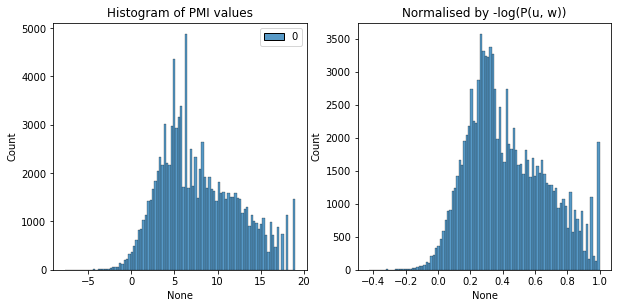

In [21]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(pmis.values())
plt.title("Histogram of PMI values")


joint = lambda u, v: NG.cond_prob(u, v)*NG.prob(u)
norm = lambda u, v: -np.log2(joint(u, v))

plt.subplot(2, 2, 2)
# sns.histplot([pmi_val/(NG.freq(w.split()[0]) + NG.freq(w.split()[1])) for w, pmi_val in pmis.items()])

sns.histplot([pmi_val/norm(*w.split()) for w, pmi_val in pmis.items()])
_ = plt.title("Normalised by -log(P(u, w))")

In [32]:
print("pairs with PMI < 17 and combined frequency <= 2:")
for w, x in pmis.items():
    if x < 17:
        u, v = w.split() 
        if NG.freq(u) == NG.freq(v) == 1:
            print("\t", u, v)

pairs with PMI < 15 and combined frequency <= 2:


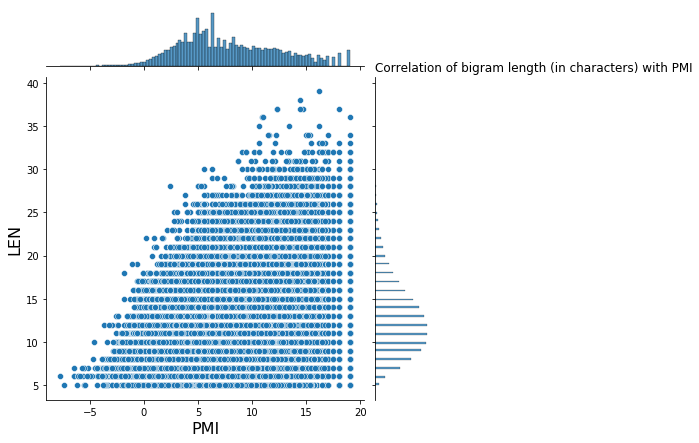

In [37]:
lens, pmi_vals = list(zip(*map(lambda t: (len(t[0]), t[1]), pmis.items())))

h = sns.jointplot(x=pmi_vals, y=lens)
h.set_axis_labels('PMI', 'LEN', fontsize=16)
_ = plt.title("Correlation of bigram length (in characters) with PMI", loc="left")

100%|██████████| 108831/108831 [00:00<00:00, 218213.37it/s]


108831 108831 108831


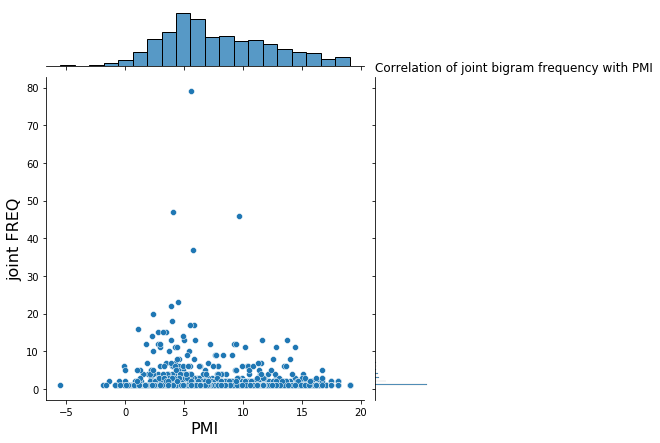

In [42]:
fs, pmi_vals = list(zip(*map(lambda t: (NG.freq(*(t[0].split())), t[1]), tqdm(pmis.items()))))

print(len(fs), len(pmi_vals), len(lens))

h = sns.jointplot(x=pmi_vals[:1000], y=fs[:1000])
_ = h.set_axis_labels('PMI', 'joint FREQ', fontsize=16)
_ = plt.title("Correlation of joint bigram frequency with PMI", loc="left")

100%|██████████| 108831/108831 [00:00<00:00, 339158.95it/s]


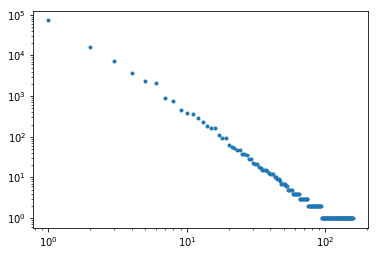

In [55]:
joint_freqs = [NG.freq(*w.split()) for w in tqdm(NG.vocab(2))]

# _ = sns.histplot(np.random.permutation(joint_freqs)[:1000])

from collections import Counter

freq_counts = Counter(joint_freqs)
rs, fs = list(zip(*enumerate((f for _, f in freq_counts.most_common()), start=1
                            )))


_ = plt.loglog(rs, fs, ".")

# Tracking a Term

### 1. words associated with a given word


*observations*

 - need to apply proper linguistic analyses to capture all variants of a word stem  
   -> merging could also be a parameter 
 - bias via lexical association should be assymmetric  (*all X are Y* implies bias about X, but not bias about Y)
 - lexical association bias is definitely also about **lack** of association (where are the "Chinese colonials"? "German colonials" exist)  
   measure lack of association by doing set difference across equivalence classes established by unigrams
 - what to do about low frequencies of pairs?

In [57]:
w = "chinees"

for w2 in NG.vocab(1):
    if w2.startswith(w) or w2.endswith(w):
        print(w2)
        
w_pairs = {pair: (v, NG.freq(*pair.split())) 
           for pair, v in pmis.items() if pair.startswith(w) or pair.endswith(w)}

sorted(w_pairs.items(), key=lambda t: t[1], reverse=True)[:-1]

chineese
chinees
chineesche
chineesch


[('chineesche voorstraat', (16.71054279066365, 1)),
 ('chineesch theater', (16.71054279066365, 1)),
 ('chineesche prostituees', (16.71054279066365, 1)),
 ('chineese wijk', (15.12558028994249, 1)),
 ('chinees porcelein', (12.882723766046329, 2)),
 ('chinees imari', (12.882723766046329, 2)),
 ('regelig chinees', (12.882723766046329, 1)),
 ('chinees verdiepingen', (12.882723766046329, 1)),
 ('chinees nieuwjaar', (12.467686266767483, 6)),
 ('chineesche wajang', (12.010103072522558, 1)),
 ('chinees shih', (11.882723766046329, 1)),
 ('chineesche tempel', (11.462615277220063, 2)),
 ('djakarta chinees', (11.297761265325173, 1)),
 ('kapitein chinees', (11.297761265325173, 1)),
 ('maleis chinees', (11.297761265325173, 1)),
 ('chinees oei', (11.297761265325171, 1)),
 ('chinees laboean', (10.882723766046329, 1)),
 ('ty chinees', (10.882723766046329, 1)),
 ('luitenant chinees', (10.075368843988725, 1)),
 ('chinees borduursel', (9.882723766046329, 1)),
 ('chinees gedicht', (9.882723766046329, 1)),
 

### 2. documents in which a pair occurs (and other pairs in that)

In [58]:
pair = "chinees nieuwjaar"

i = NG.vocab()[pair]


found = np.argwhere(NG.term_doc_matrix[:, i] > 0)[:, 0]
pair_txts = [txts[ind] for ind in found]
found, pair_txts

(array([ 8777,  8778, 10568, 10569, 10570, 10571], dtype=int32),
 ["Een van de zes (zeven) wintergezichten in Tartarije\r\n\r\nGezicht op figuren in een winters landschap met een tentenkamp buiten een ommuurde woonstede.\r\n\r\nOp deze schildering is een klein tentenkamp van het vendel Rood omrand te zien buiten de muur van de woonstede van een Mandarijn.  In de verte zijn meer tenten zichtbaar. De woning van een Mandarijn is doorgaans herkenbaar aan twee hoge palen die terzijde van de poort staan. Overdag worden hieraan twee vlaggen bevestigd als teken van zijn waardigheid en 's nachts zijn ze voorzien van lampions.  Een wapperende vlag met Chinese tekens is op het schilderij afgebeeld. Hooggeplaatste Chinezen zonderden zich graag af, daarom waren hun woningen vaak omgeven door een muur. De plek zou ook het keizerlijke onderkomen in Jehol (het huidige Chengde) kunnen voorstellen, aangezien er goudgele daken op de gebouwen binnen de muur te zien zijn. Deze kleur dakbedekking mocht alle

In [59]:
all_pairs = pair_txts[0].split()
all_pairs = [(w1 + " " + w2).lower() for w1, w2 in zip(all_pairs[:-1], all_pairs[1:])]

sorted(((p, pmis[p], NG.freq(p)) for p in all_pairs if p in pmis), key=lambda t: t[1], reverse=True)

[('ommuurde woonveste', 17.447508384829852, 1),
 ('chao dai', 17.447508384829852, 3),
 ('afgezaagde boomstronken', 16.71054279066365, 1),
 ('guiseppe castiglione', 16.447508384829852, 6),
 ('minds perceive', 16.447508384829852, 6),
 ('observes bleakness', 16.447508384829852, 6),
 ('keenly observed', 16.447508384829852, 6),
 ('thereupon expressed', 16.447508384829852, 6),
 ('lifeless trunks', 16.447508384829852, 6),
 ('goudgele daken', 16.225115963493405, 1),
 ('voorgebergten fungeerden', 16.03247088555101, 6),
 ('latter refers', 16.03247088555101, 6),
 ('favoriet seizoen', 15.862545884108698, 6),
 ('notie betekende', 15.862545884108698, 6),
 ('shanshui hua', 15.710542790663649, 6),
 ('human minds', 15.710542790663647, 6),
 ('terugkerend fenomeen', 15.640153462772249, 6),
 ('special exhibition', 15.617433386272166, 6),
 ('william shang', 15.447508384829854, 12),
 ('william shang', 15.447508384829854, 12),
 ('brachten gravures', 15.332031167409916, 6),
 ('important component', 15.3320311

In [63]:
all_pairs = pair_txts[0].split()
all_pairs = [(w + " " + w2).lower() for w2 in all_pairs] + [(w2 + " " + w).lower() for w2 in all_pairs]

sorted(((p, pmis[p], NG.freq(p)) for p in all_pairs if p in pmis), key=lambda t: t[1], reverse=True)

[]